### Dataset Overview
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [62]:

import seaborn as sns
from sklearn import metrics

# remove warnings from the output
import warnings
warnings.filterwarnings("ignore")

In [63]:
import pandas as pd

file_path = 'data/kc_house_data.csv'
original_df = pd.read_csv(file_path)

print(original_df.head())
print("Number of rows:", original_df.shape[0])

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [64]:
# info
print(original_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

We have 19 columns and 21613 rows. 
There are all numerical columns except for the date column.
but there are some columns that are categorical in nature.
Let's see the relationship between the variables and the price.

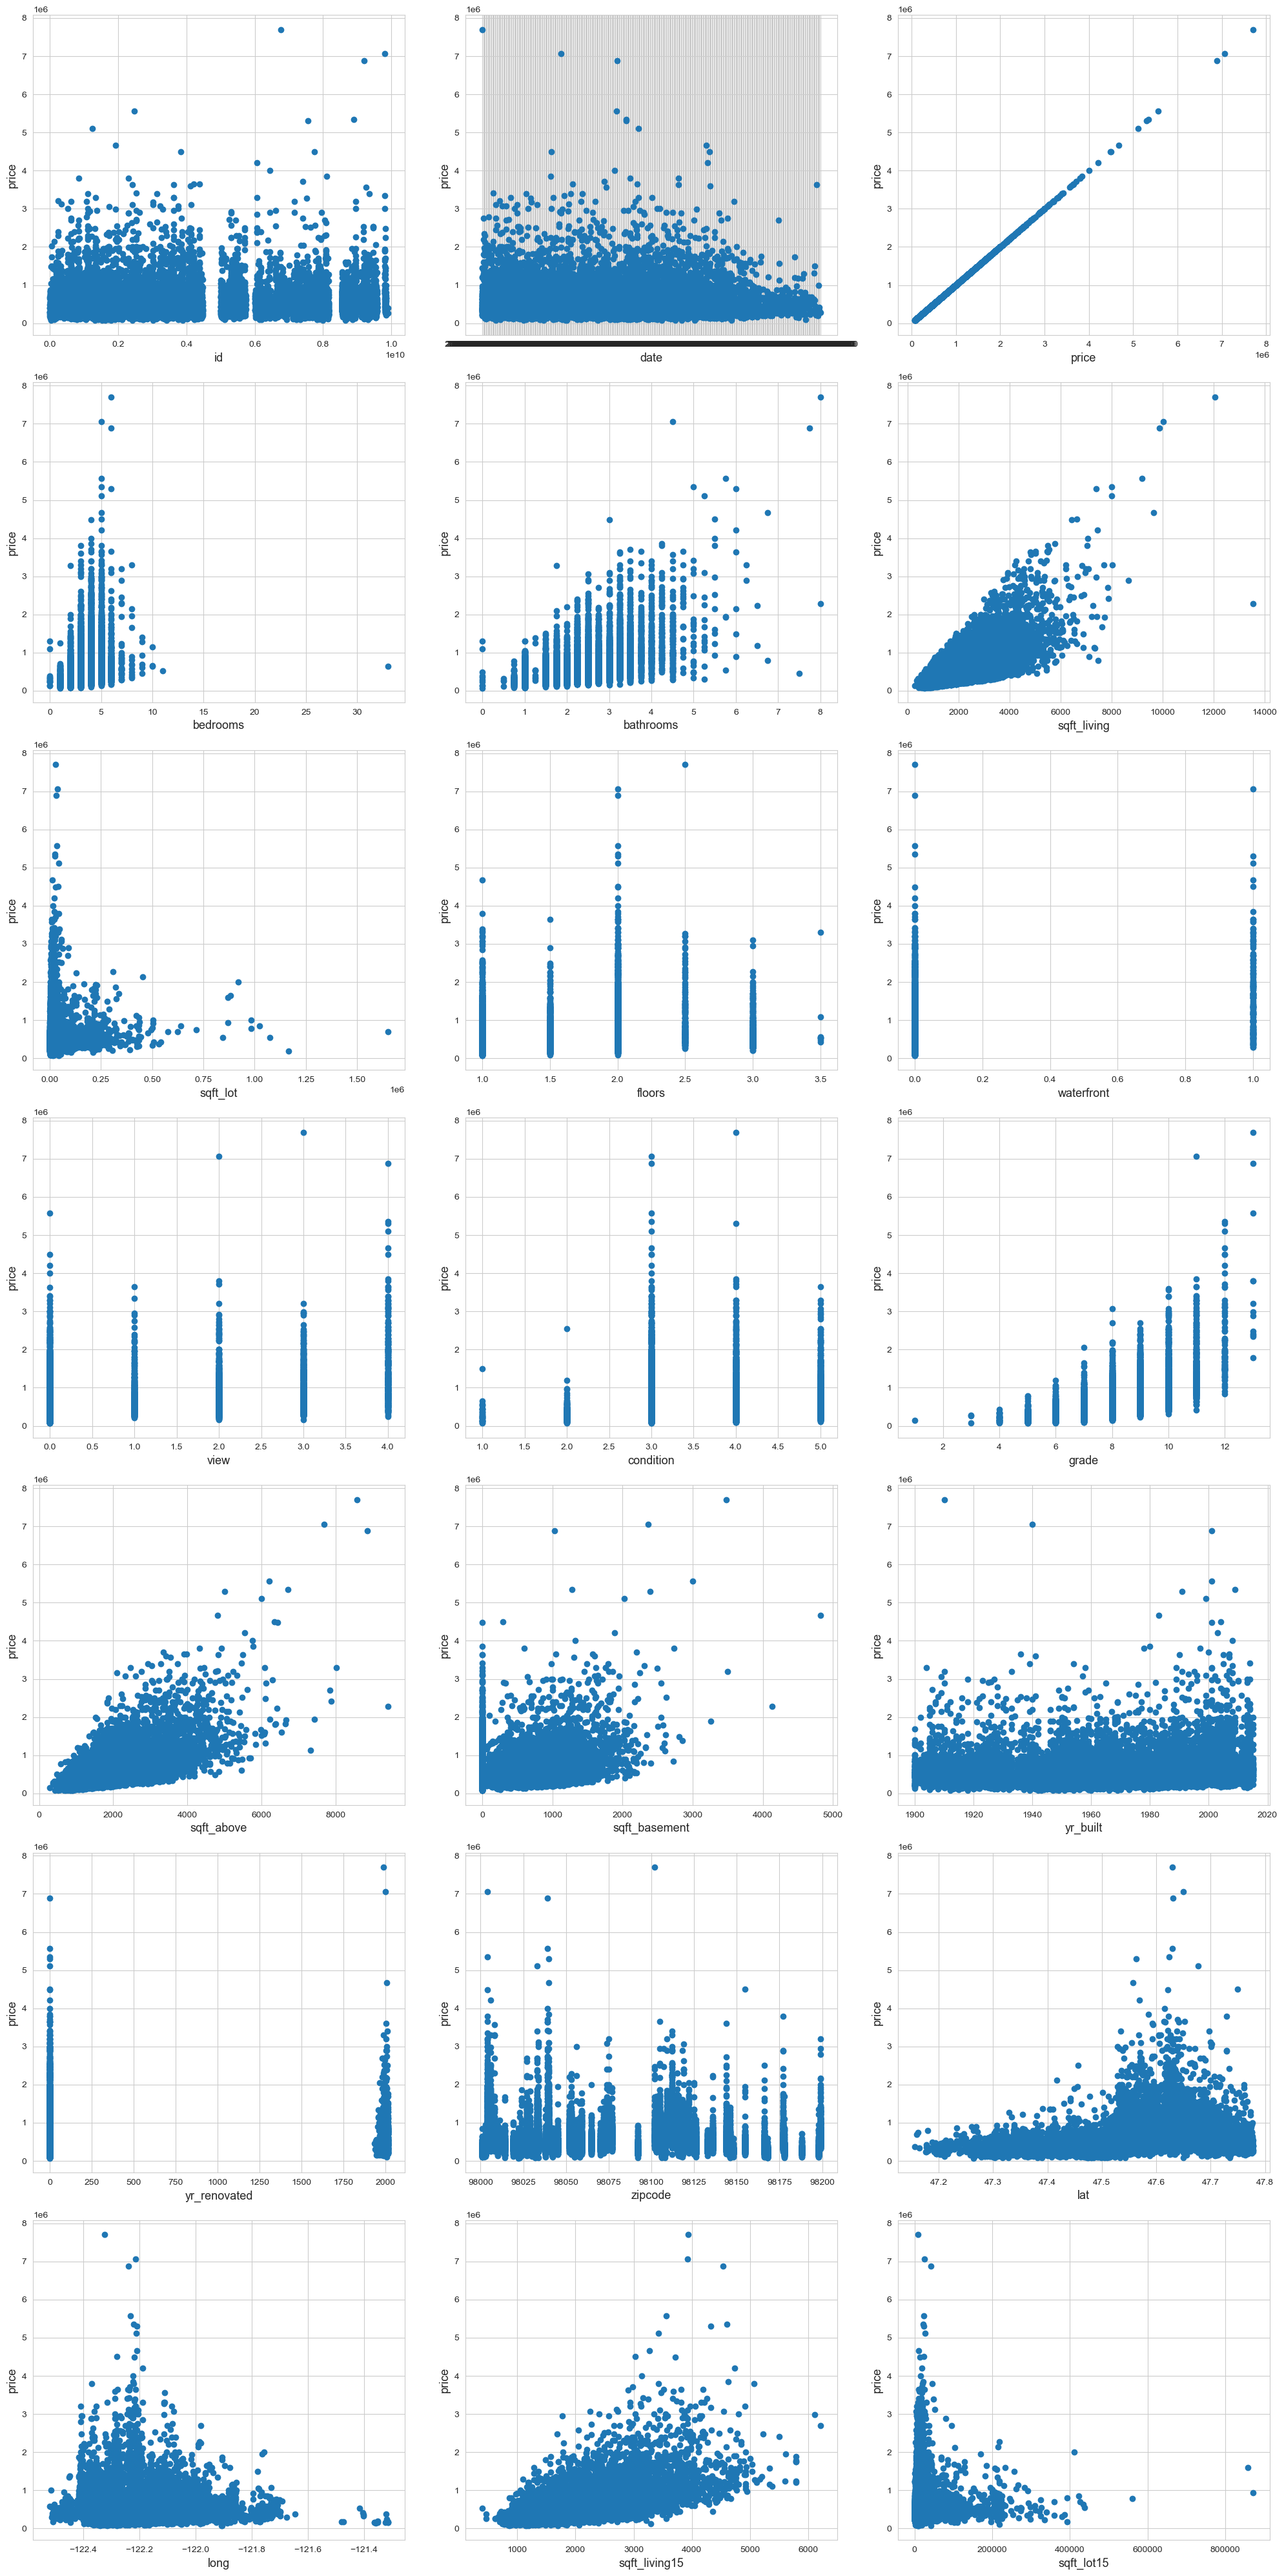

In [65]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(ncols=3, nrows=original_df.shape[1] // 3, figsize=(20, 40))

# Flatten the axes array to easily iterate over it
axs = axs.flatten()

for i, col in enumerate(original_df.columns):
    # Check if we have more columns than subplots
    if i < len(axs):
        axs[i].scatter(x = original_df[col], y = original_df['price'])
        axs[i].set_ylabel('price', fontsize=13)
        axs[i].set_xlabel(col, fontsize=13)

plt.tight_layout()
plt.show()

We can see that some variables have a linear relationship with the price, such as sqft_living, sqft_above, sqft_living15, and sqft_lot15.
There are some outliers in the data that we need to remove.
- sqft_living > 12000 and price < 3000000, we can remove these rows.
- bedrooms > 30 and price < 1000000, we can remove these rows.

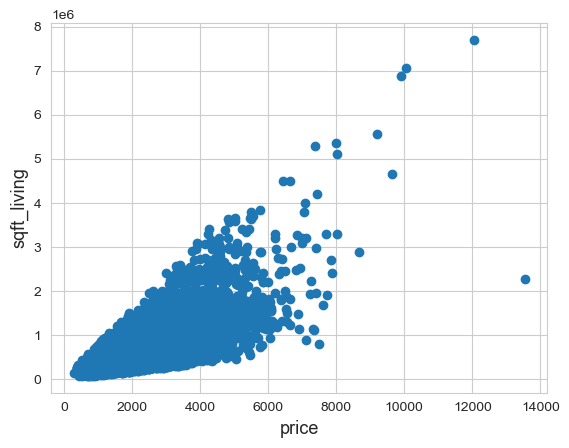

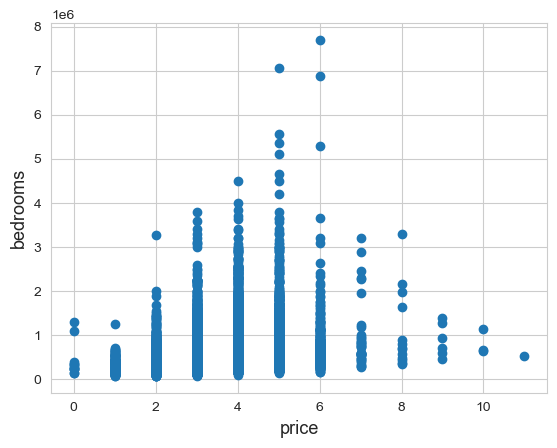

In [66]:
# Deleting outliers
# 
df = original_df.drop(original_df[(original_df['sqft_living']>12000) & (original_df['price']<3000000)].index)
df = original_df.drop(original_df[(original_df['bedrooms']>30) & (original_df['price']<1000000)].index)
df_num = df.select_dtypes(include=['float64', 'int64'])

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(df['sqft_living'], df['price'])
plt.ylabel('sqft_living', fontsize=13)
plt.xlabel('price', fontsize=13)
plt.show()

fig, ax = plt.subplots()
ax.scatter(df['bedrooms'], df['price'])
plt.ylabel('bedrooms', fontsize=13)
plt.xlabel('price', fontsize=13)
plt.show()

In [67]:
# Check null
print(df.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


There are no missing values in the dataset.

In [68]:
# Check duplicated
print(df.duplicated().sum())

0


There are no duplicated rows in the dataset.

We drop some columns that not useful for the model.

In [69]:
# drop column id
df.drop('id', axis=1, inplace=True)
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

<Axes: xlabel='year', ylabel='price'>

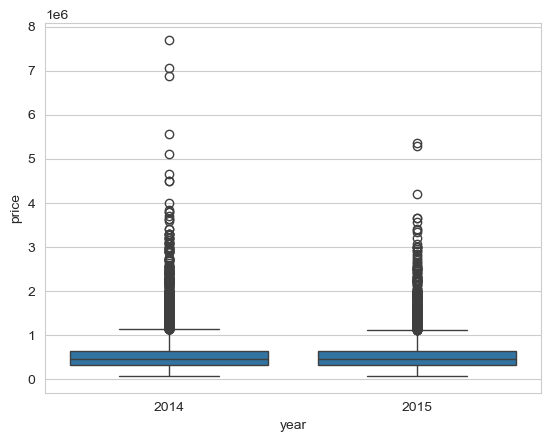

In [70]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].apply(lambda date:date.month)
df['year'] = df['date'].apply(lambda date:date.year)
sns.boxplot(x='year',y='price',data=df)

<Axes: xlabel='month', ylabel='price'>

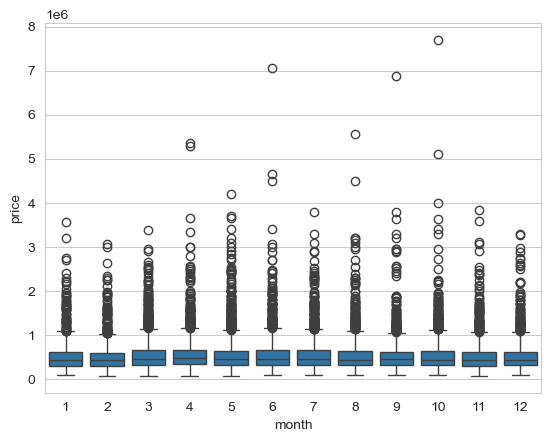

In [71]:
sns.boxplot(x='month',y='price',data=df)

<Axes: xlabel='month'>

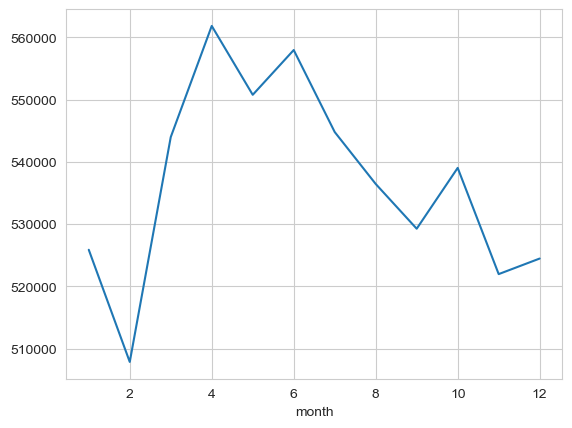

In [72]:
df.groupby('month').mean()['price'].plot() 

From this graph, it's clear that houses are the least profitable on average in February. Meanwhile, it's on average the most profitable to sell a house in April to June

--------------------------

<Axes: xlabel='year'>

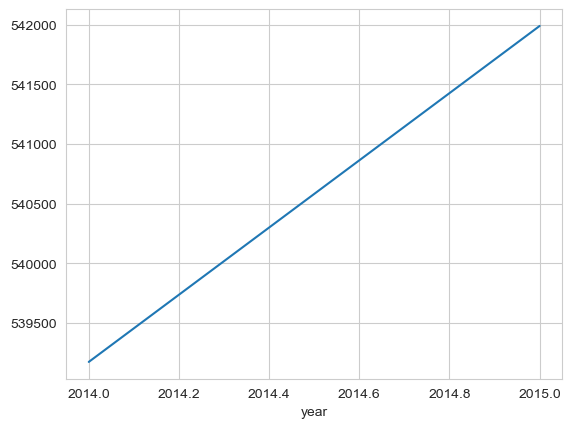

In [73]:
df.groupby('year').mean()['price'].plot()

In [74]:
df = df.drop('date',axis=1)
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [75]:
df = df.drop('zipcode',axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


In [76]:
# Check categorical of number columns
df_num = df.select_dtypes(include=['float64', 'int64'])
df_cat = df.select_dtypes(include=['object'])
# filter all numeric columns that are categorical, convert them to object, and add them to the categorical dataframe, remove them from the numeric dataframe
for col in df_num.columns:
    if len(df_num[col].unique()) < 50:
        df_cat[col] = df_num[col].astype('object')
        df_num.drop(col, axis=1, inplace=True)
print(df_num.columns)
print(df_cat.columns)

Index(['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')
Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'month', 'year'],
      dtype='object')


In [77]:
# cormap = df_num.corr()
# plt.figure(figsize=(20,20))
# sns.heatmap(cormap, annot=True, cmap='coolwarm')
# plt.show()



 ## Exploratory Data Analysis

The dataset has 19 columns and 21613 rows. The columns are:
* categorical: waterfront, view, grade, condition, bedrooms, bathrooms, floors
* numerical: price, sqft_living, sqft_lot, sqft_above, sqft_basement, yr_built, yr_renovated, lat, long, sqft_living15, sqft_lot15

To visualize the numerical variables, we'll turn them into categorical variables.

### Feature Engineering

In [78]:
#grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design. Create a new column with 3 categories: low, average, high quality
# def grade_cat(grade):
#     if grade >= 11:
#         return 'high'
#     elif grade <= 3:
#         return 'low'
#     else:
#         return 'average'
# df['grade_cat'] = df['grade'].apply(grade_cat)
# df['grade_cat'].value_counts()

The only information we have about each house's age is the year it was built, aka yr_built. Let's convert those values to see how many years old each house is, and if there's a signifigant relationship there.

In [79]:
# subtracting 'yr_built' with the current year
# df['age'] = 2024 - df['yr_built']
# # age vs price
# sns.scatterplot(x='age', y='price', data=df)
# plt.show()

In [80]:
# there was a crazy outlier so we'll just replace that with the median
# df.loc[df.age < 0] = df.age.median()

In [81]:
#yr_renovated - The year of the house’s last renovation. Create a new column with 2 categories: renovated, not renovated
def renovated_cat(year):
    if year == 0:
        return 'not renovated'
    else:
        return 'renovated'
df['renovated_cat'] = df['yr_renovated'].apply(renovated_cat)
df['renovated_cat'].value_counts()

renovated_cat
not renovated    20698
renovated          914
Name: count, dtype: int64

In [82]:
#yr_built - The year the house was initially built. Create a new column with 3 categories: old, middle, new
def built_cat(year):
    if year < 1950:
        return 'old'
    elif year > 1999:
        return 'new'
    else:
        return 'middle'
df['built_cat'] = df['yr_built'].apply(built_cat)
df['built_cat'].value_counts()

built_cat
middle    11917
old        4936
new        4759
Name: count, dtype: int64

In [83]:
#sqft_basement - The square footage of the interior housing space that is below ground level. Create a new column with 2 categories: has basement, no basement
def basement_cat(sqft):
    if sqft == 0:
        return 'no basement'
    else:
        return 'has basement'
df['basement_cat'] = df['sqft_basement'].apply(basement_cat)
df['basement_cat'].value_counts()

basement_cat
no basement     13126
has basement     8486
Name: count, dtype: int64

In [84]:
#waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not. Create a new column with 2 categories: has waterfront, no waterfront
# def waterfront_cat(waterfront):
#     if waterfront == 0:
#         return 'no waterfront'
#     else:
#         return 'has waterfront'
# df['waterfront_cat'] = df['waterfront'].apply(waterfront_cat)

In [85]:
#view - An index from 0 to 4 of how good the view of the property was. Create a new column with 4 categories: bad view, average view, good view, very good view
# def view_cat(view):
#     if view == 0:
#         return 'bad view'
#     elif view == 1:
#         return 'average view'
#     elif view == 2:
#         return 'good view'
#     else:
#         return 'very good view'
# df['view_cat'] = df['view'].apply(view_cat)
# df['view_cat'].value_counts()

In [86]:
#floors - Number of floors. Create a new column with 2 categories: 1 floor, more than 1 floor
# def floors_cat(floors):
#     if floors == 1:
#         return '1 floor'
#     else:
#         return 'more than 1 floor'
# df['floors_cat'] = df['floors'].apply(floors_cat)
# df['floors_cat'].value_counts()

In [87]:
#bedrooms - Number of bedrooms. Create a new column with 2 categories: 1-2 bedrooms, 3 and more bedrooms
# def bedrooms_cat(bedrooms):
#     if bedrooms < 4:
#         return '1-3 bedrooms'
#     else:
#         return '4 and more bedrooms'
# df['bedrooms_cat'] = df['bedrooms'].apply(bedrooms_cat)
# df['bedrooms_cat'].value_counts()

In [88]:
#bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower. Create a new column with 2 categories: 1-2 bathrooms, 3 and more bathrooms
# def bathrooms_cat(bathrooms):
#     if bathrooms < 3:
#         return '1-2 bathrooms'
#     else:
#         return '3 and more bathrooms'
# df['bathrooms_cat'] = df['bathrooms'].apply(bathrooms_cat)
# df['bathrooms_cat'].value_counts()

In [89]:
#sqft_living - Square footage of the apartments interior living space. Create a new column with 4 categories: small, medium, big, very big
def sqft_living_cat(sqft):
    if sqft < 1500:
        return 'small'
    elif sqft < 2500:
        return 'medium'
    elif sqft < 3500:
        return 'big'
    else:
        return 'very big'
df['sqft_living_cat'] = df['sqft_living'].apply(sqft_living_cat)
df['sqft_living_cat'].value_counts()

sqft_living_cat
medium      9607
small       6218
big         4224
very big    1563
Name: count, dtype: int64

In [90]:
#sqft_lot - Square footage of the land space. Create a new column with 4 categories: small, medium, big, very big
def sqft_lot_cat(sqft):
    if sqft < 5000:
        return 'small'
    elif sqft < 10000:
        return 'medium'
    elif sqft < 15000:
        return 'big'
    else:
        return 'very big'
df['sqft_lot_cat'] = df['sqft_lot'].apply(sqft_lot_cat)
df['sqft_lot_cat'].value_counts()

sqft_lot_cat
medium      10464
small        4932
very big     3273
big          2943
Name: count, dtype: int64

In [91]:
#sqft_above - The square footage of the interior housing space that is above ground level. Create a new column with 4 categories: small, medium, big, very big
def sqft_above_cat(sqft):
    if sqft < 1500:
        return 'small'
    elif sqft < 2500:
        return 'medium'
    elif sqft < 3500:
        return 'big'
    else:
        return 'very big'
df['sqft_above_cat'] = df['sqft_above'].apply(sqft_above_cat)
df['sqft_above_cat'].value_counts()

sqft_above_cat
small       9974
medium      7722
big         3003
very big     913
Name: count, dtype: int64

In [92]:
#sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors. Create a new column with 4 categories: small, medium, big, very big  
def sqft_living15_cat(sqft):
    if sqft < 1500:
        return 'small'
    elif sqft < 2500:
        return 'medium'
    elif sqft < 3500:
        return 'big'
    else:
        return 'very big'
df['sqft_living15_cat'] = df['sqft_living15'].apply(sqft_living15_cat)
df['sqft_living15_cat'].value_counts()

sqft_living15_cat
medium      11634
small        5536
big          3700
very big      742
Name: count, dtype: int64

In [93]:
#sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors. Create a new column with 4 categories: small, medium, big, very big
def sqft_lot15_cat(sqft):
    if sqft < 5000:
        return 'small'
    elif sqft < 10000:
        return 'medium'
    elif sqft < 15000:
        return 'big'
    else:
        return 'very big'
df['sqft_lot15_cat'] = df['sqft_lot15'].apply(sqft_lot15_cat)
df['sqft_lot15_cat'].value_counts()

sqft_lot15_cat
medium      11296
small        4721
big          2925
very big     2670
Name: count, dtype: int64

In [94]:
#lat - Lattitude. Create a new column with 2 categories: north, south
def lat_cat(lat):
    if lat > 47.5:
        return 'north'
    else:
        return 'south'
df['lat_cat'] = df['lat'].apply(lat_cat)
df['lat_cat'].value_counts()

lat_cat
north    15002
south     6610
Name: count, dtype: int64

In [95]:
# long - Longitude. Create a new column with 2 categories: east, west
def long_cat(long):
    if long > -122.2:
        return 'east'
    else:
        return 'west'
df['long_cat'] = df['long'].apply(long_cat)
df['long_cat'].value_counts()

long_cat
west    12324
east     9288
Name: count, dtype: int64

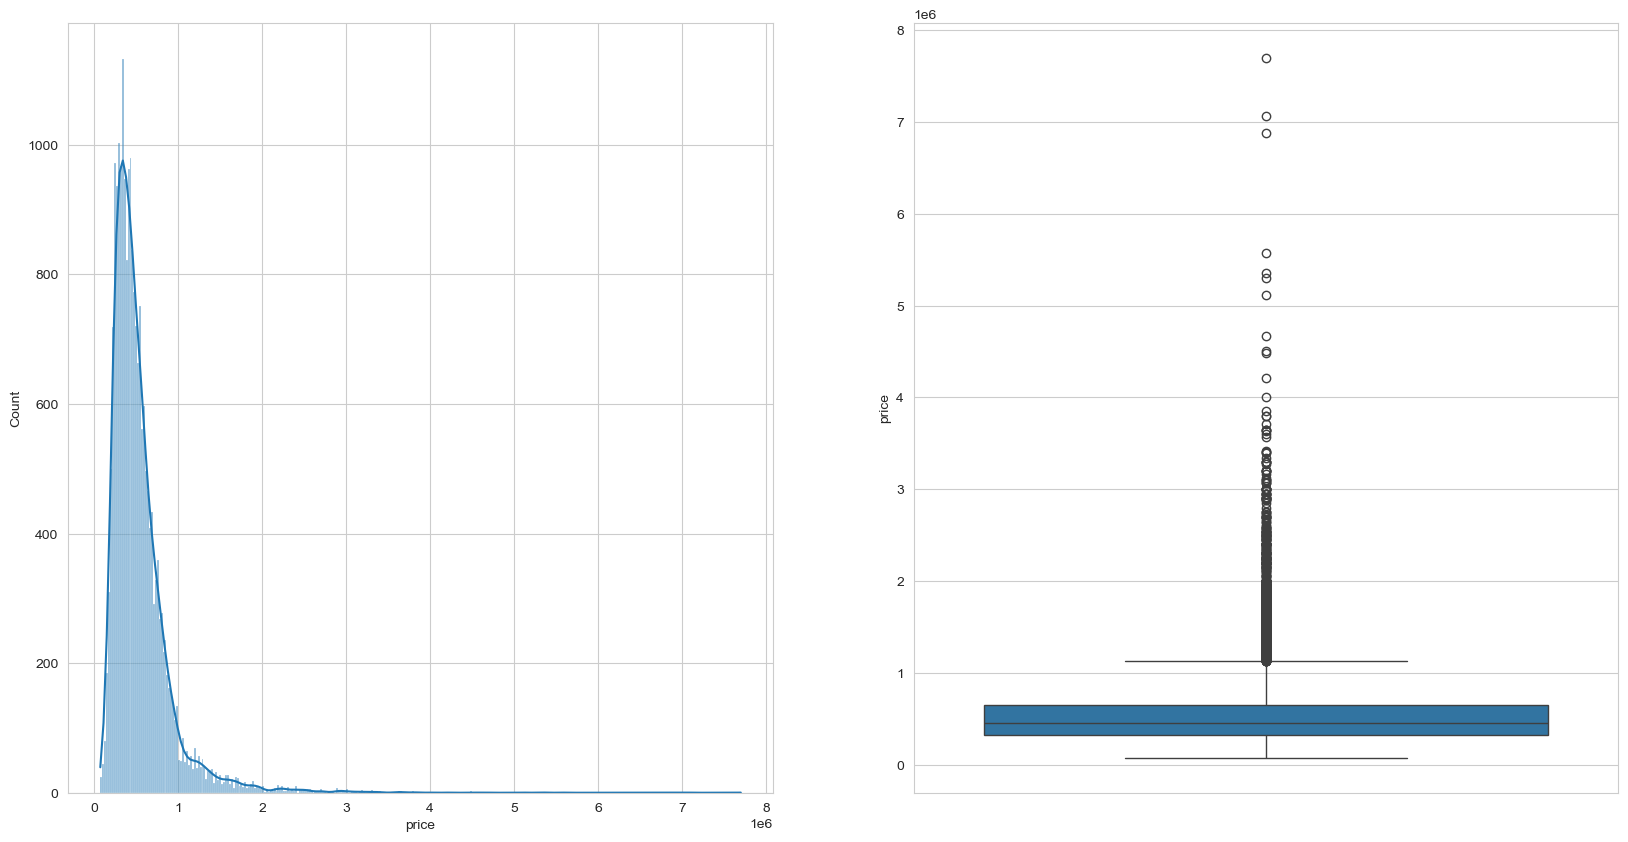

In [96]:
# Predict variable
y = df['price']
fig, axs = plt.subplots(ncols=2, figsize=(20, 10))
sns.histplot(y, kde=True, ax=axs[0])
sns.boxplot(y, ax=axs[1])
plt.show()


The target variable is right-skewed. We'll apply the log transformation to make it normally distributed.

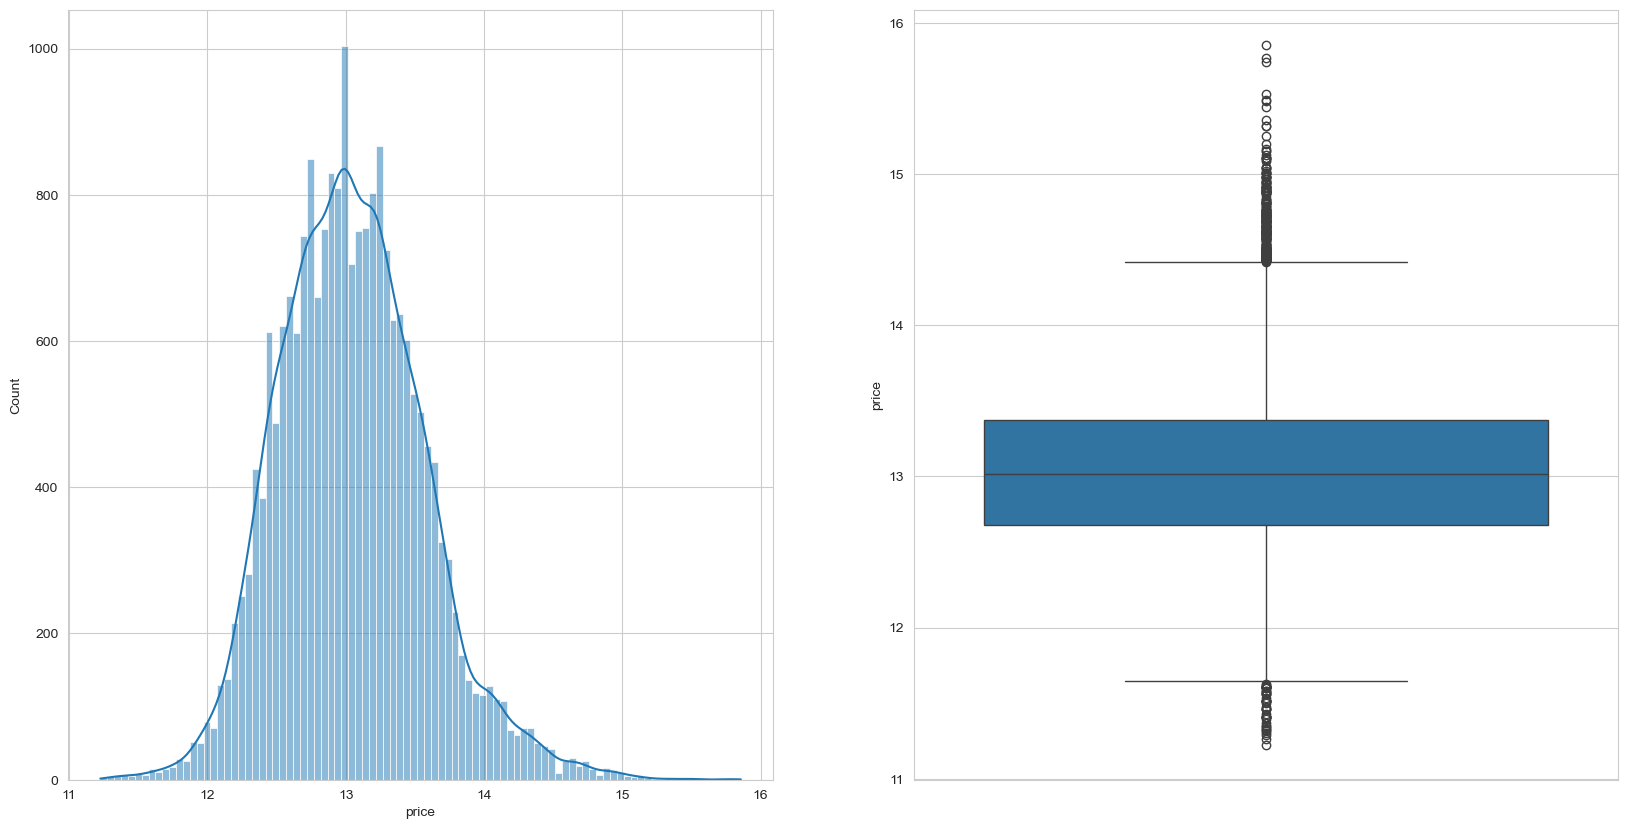

In [97]:
import numpy as np

y_log = np.log1p(y)
fig, axs = plt.subplots(ncols=2, figsize=(20, 10))
sns.histplot(y_log, kde=True, ax=axs[0])
sns.boxplot(y_log, ax=axs[1])
plt.show()


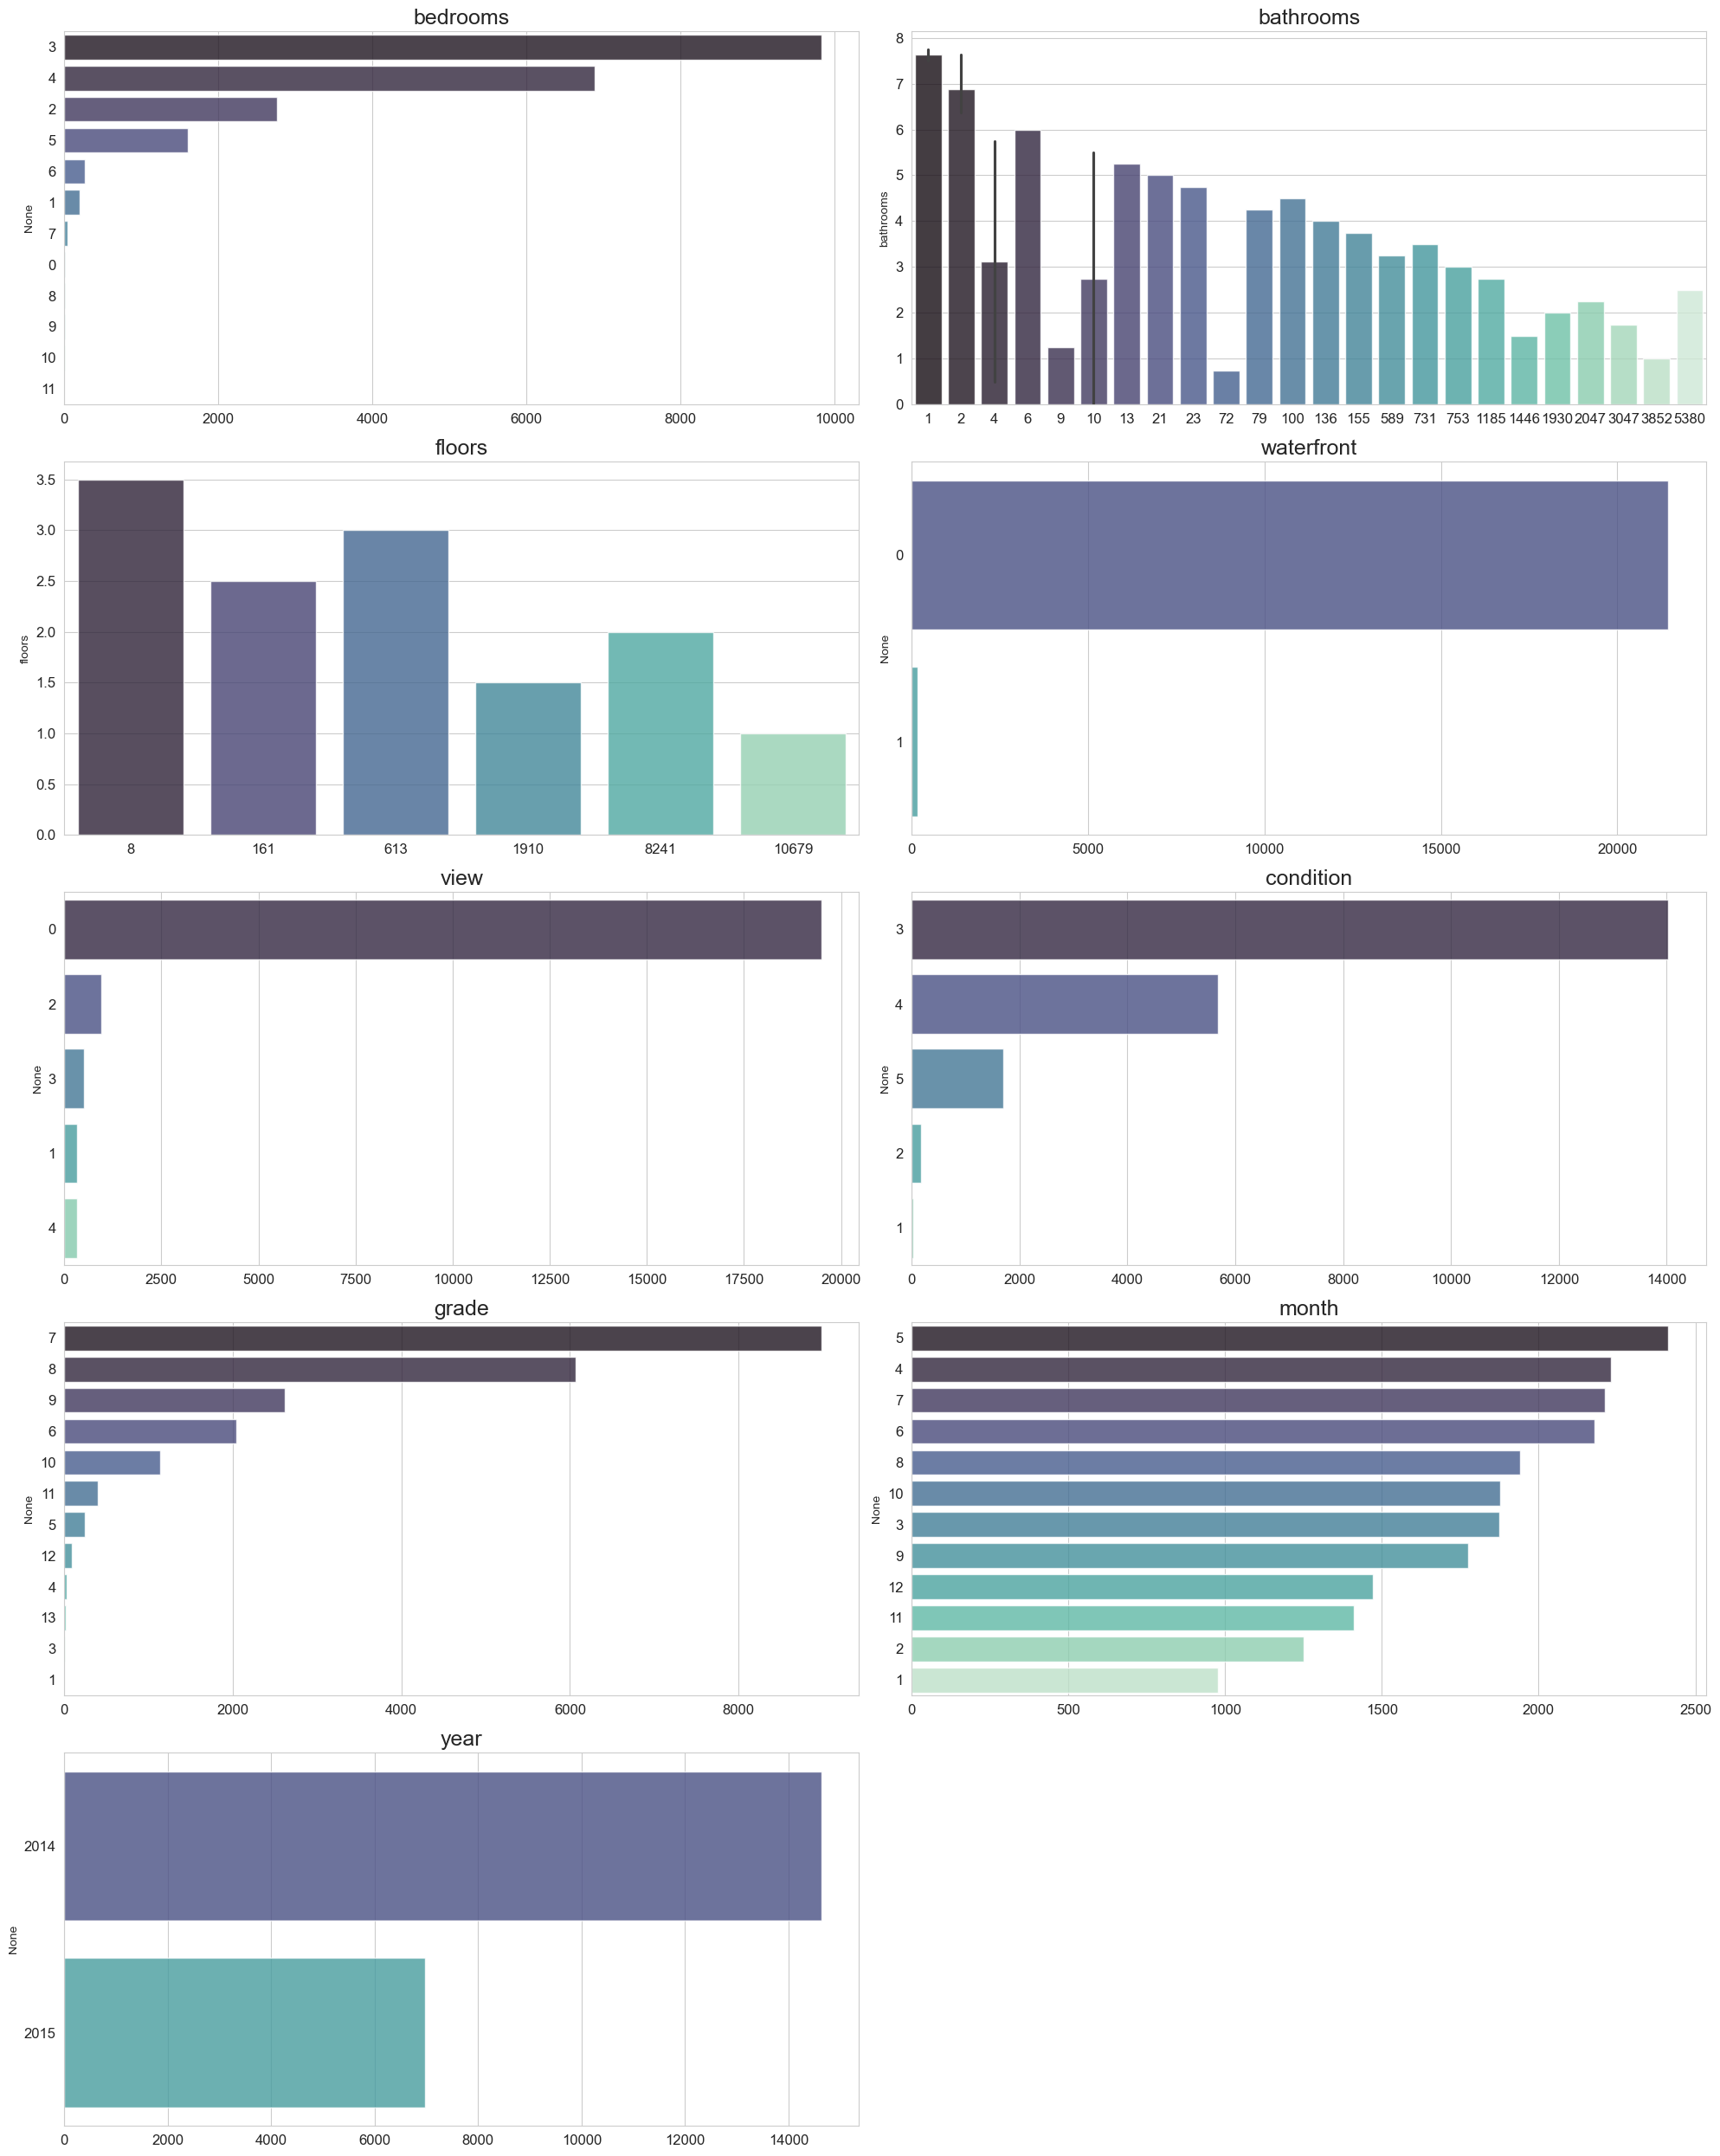

In [98]:
# Analyze categorical variables
num_plot = len(df_cat.columns)
num_cols = min(num_plot, 2)
num_rows = int(num_plot / num_cols) + (1 if num_plot % num_cols != 0 else 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))

if isinstance(axes, np.ndarray):
    list_axes = list(axes.flat)
else:
    list_axes = [axes]

for index, col in enumerate(df_cat.columns):
    df_count = df[col].value_counts()

    if (df_count.index.dtype == np.int64):
        df_count.index = map(str, df_count.index)

    sns.barplot(ax = list_axes[index] , x = df_count.values, y = df_count.index , alpha=0.8, palette='mako')
    list_axes[index].set_title(col, fontsize=18)
    list_axes[index].tick_params(axis="x", labelsize=12)
    list_axes[index].tick_params(axis="y", labelsize=12)

for i in range(num_plot, len(list_axes)):
    list_axes[i].set_visible(False)


fig.tight_layout()
plt.show()

In [99]:
# Frequency of categorical variables
for col in df_cat.columns:
    temp_df = df[col].value_counts().rename_axis(col).reset_index(name='counts')
    temp_df["frequency"] = round(temp_df["counts"]/len(df) * 100, 2)
    print(temp_df)

    bedrooms  counts  frequency
0          3    9824      45.46
1          4    6882      31.84
2          2    2760      12.77
3          5    1601       7.41
4          6     272       1.26
5          1     199       0.92
6          7      38       0.18
7          0      13       0.06
8          8      13       0.06
9          9       6       0.03
10        10       3       0.01
11        11       1       0.00
    bathrooms  counts  frequency
0        2.50    5380      24.89
1        1.00    3852      17.82
2        1.75    3047      14.10
3        2.25    2047       9.47
4        2.00    1930       8.93
5        1.50    1446       6.69
6        2.75    1185       5.48
7        3.00     753       3.48
8        3.50     731       3.38
9        3.25     589       2.73
10       3.75     155       0.72
11       4.00     136       0.63
12       4.50     100       0.46
13       4.25      79       0.37
14       0.75      72       0.33
15       4.75      23       0.11
16       5.00      21  

- About bedrooms: Most houses have 3 bedrooms.
- About bathrooms: Most houses have 2.5 bathrooms.
- About floors: Most houses have 1 floor.
- About waterfront: Most houses do not have a waterfront view.
- About view: Most houses have a view index of 0, that mean poor view.
- About condition: Most houses have a condition index of 3, that mean medium condition.
- About grade: Most houses have a grade index of 7, that mean medium of house quality.
- Most house have good sell at April to June.

From fig below, the number of house have 8 bedrooms is very low, but the price is very high while the number of house have 3 bedrooms is very high, but the price is medium.

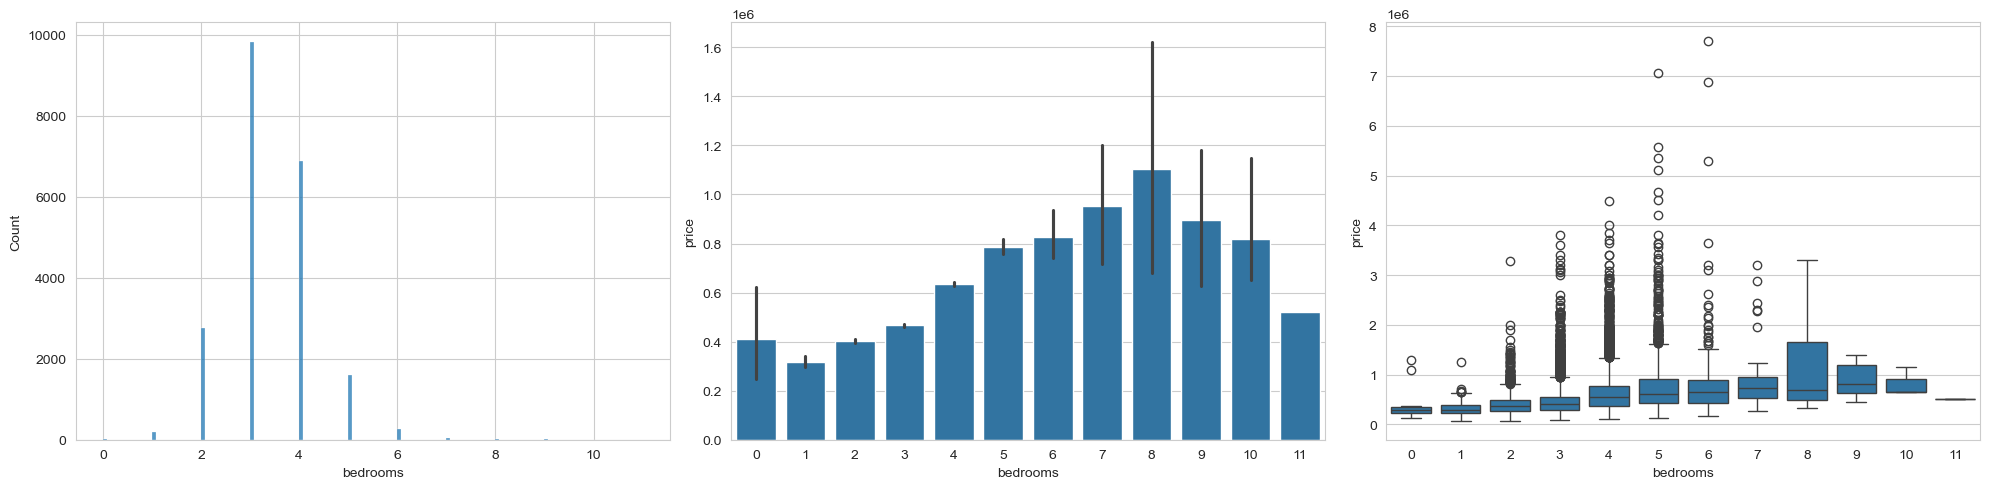

In [100]:
# About bedrooms
fig, axs = plt.subplots(ncols=3, figsize=(20, 5))
sns.histplot(x='bedrooms', data=df, ax=axs[0])
sns.barplot(x='bedrooms', y='price', data=df, ax=axs[1])
sns.boxplot(x='bedrooms', y='price', data=df, ax=axs[2])
plt.tight_layout()

From fig below, the number of house have 2.5 bathrooms is very high, but the price is medium while the number of house have 4 bathrooms is very low, but the price is very high.

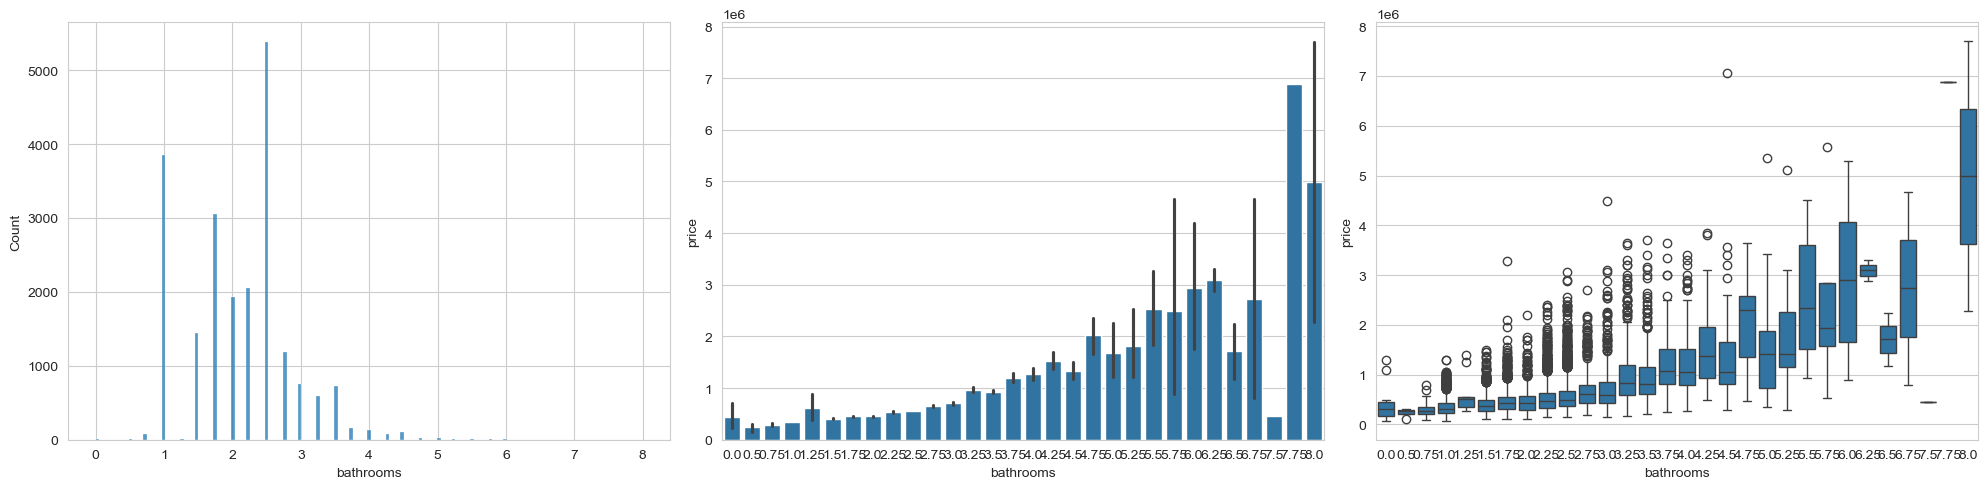

In [101]:
# About bathrooms
fig, axs = plt.subplots(ncols=3, figsize=(20, 5))
sns.histplot(x='bathrooms', data=df, ax=axs[0])
sns.barplot(x='bathrooms', y='price', data=df, ax=axs[1])
sns.boxplot(x='bathrooms', y='price', data=df, ax=axs[2])
plt.tight_layout()

From fig below, the number of house have 1 floor is very high, but the price is medium while the number of house have 2 floors is very low, but the price is very high.

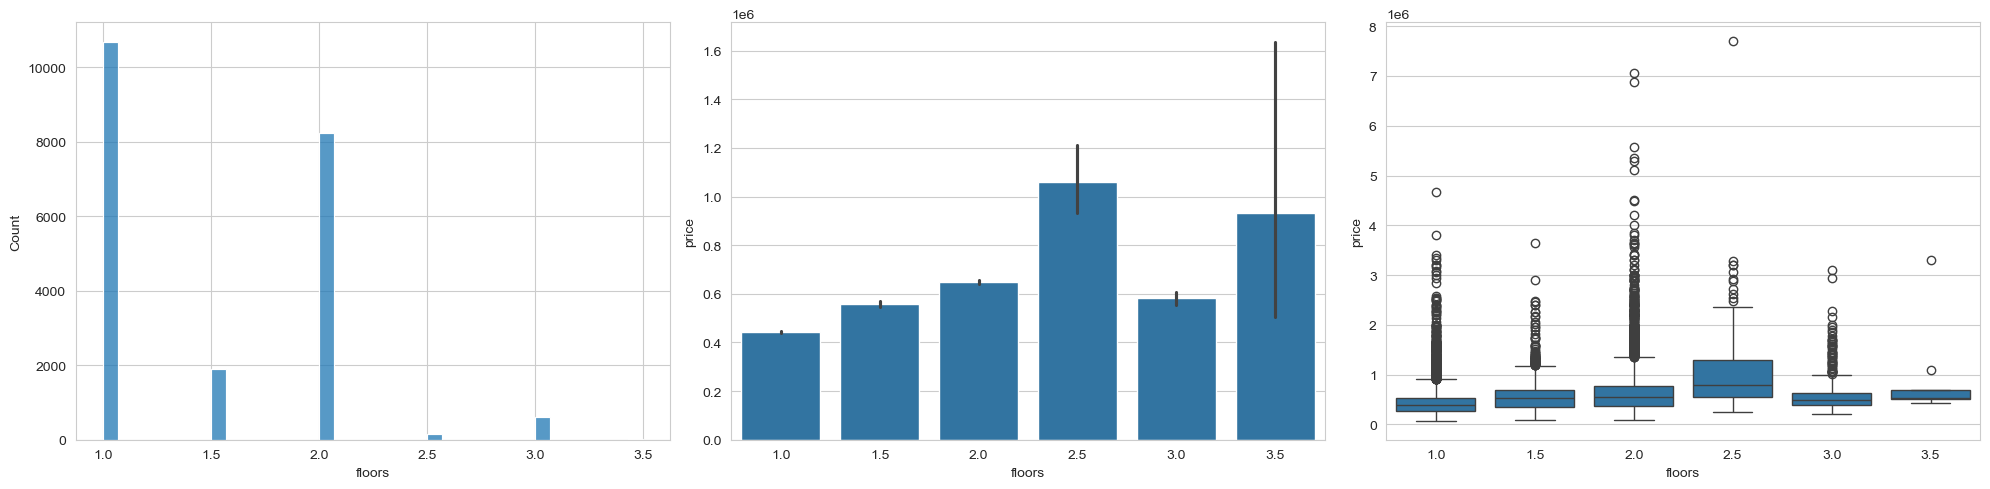

In [102]:
# About floors
fig, axs = plt.subplots(ncols=3, figsize=(20, 5))
sns.histplot(x='floors', data=df, ax=axs[0])
sns.barplot(x='floors', y='price', data=df, ax=axs[1])
sns.boxplot(x='floors', y='price', data=df, ax=axs[2])
plt.tight_layout()

From fig below, we can see that most house do not have a `waterfront` view, but if the house has a waterfront view, the price is very high.

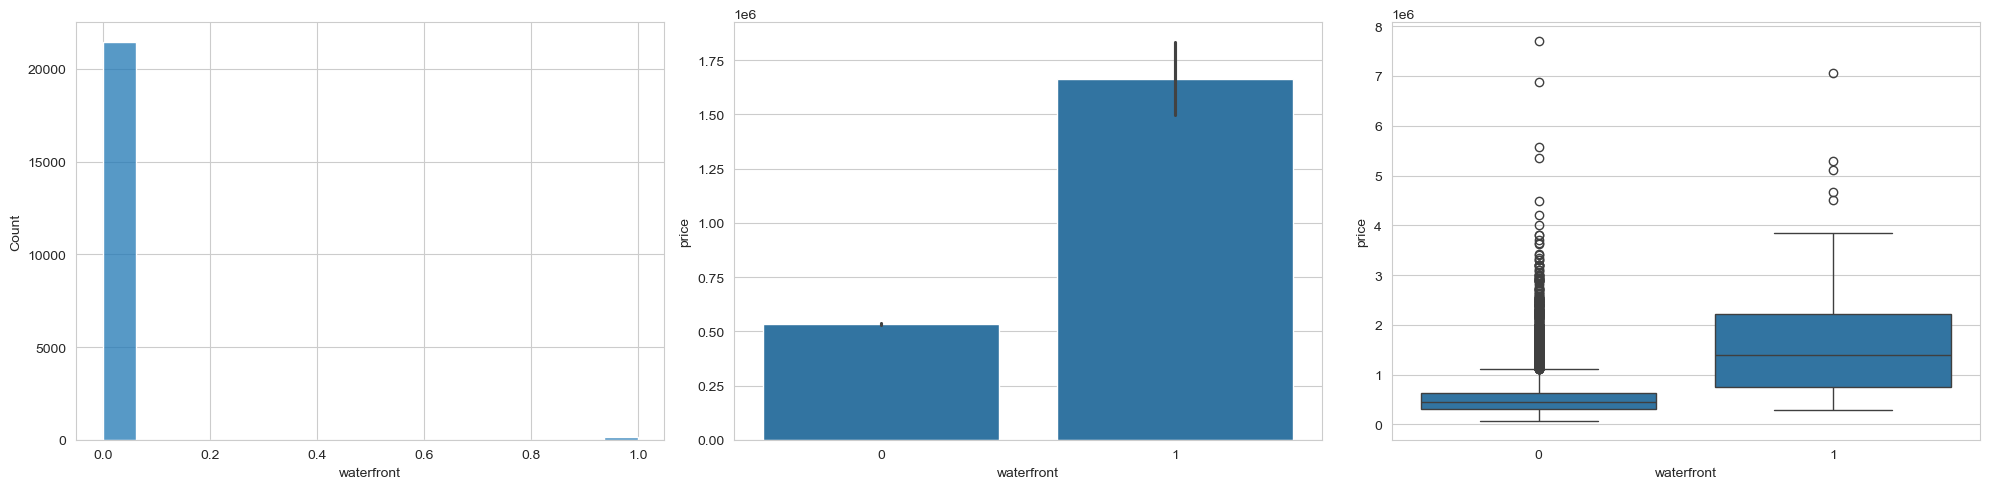

In [103]:
# About waterfront
fig, axs = plt.subplots(ncols=3, figsize=(20, 5))
sns.histplot(x='waterfront', data=df, ax=axs[0])
sns.barplot(x='waterfront', y='price', data=df, ax=axs[1])
sns.boxplot(x='waterfront', y='price', data=df, ax=axs[2])
plt.tight_layout()

From fig below, the number of house have a `view` index of 0 is very high, but the price is medium while the number of house have a view index of 4 is very low, but the price is very high.

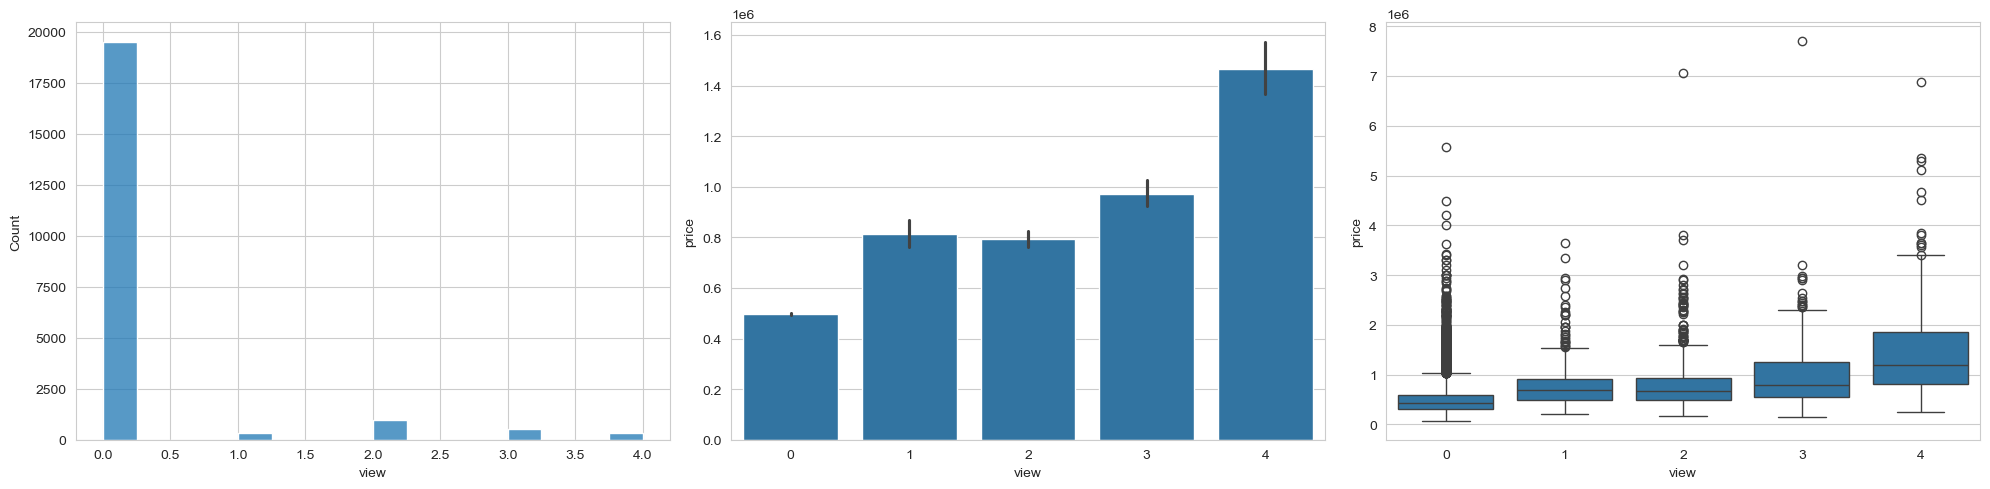

In [104]:
# About view
fig, axs = plt.subplots(ncols=3, figsize=(20, 5))
sns.histplot(x='view', data=df, ax=axs[0])
sns.barplot(x='view', y='price', data=df, ax=axs[1])
sns.boxplot(x='view', y='price', data=df, ax=axs[2])
plt.tight_layout()

About `condition`, look like the price is not much different between the condition index.

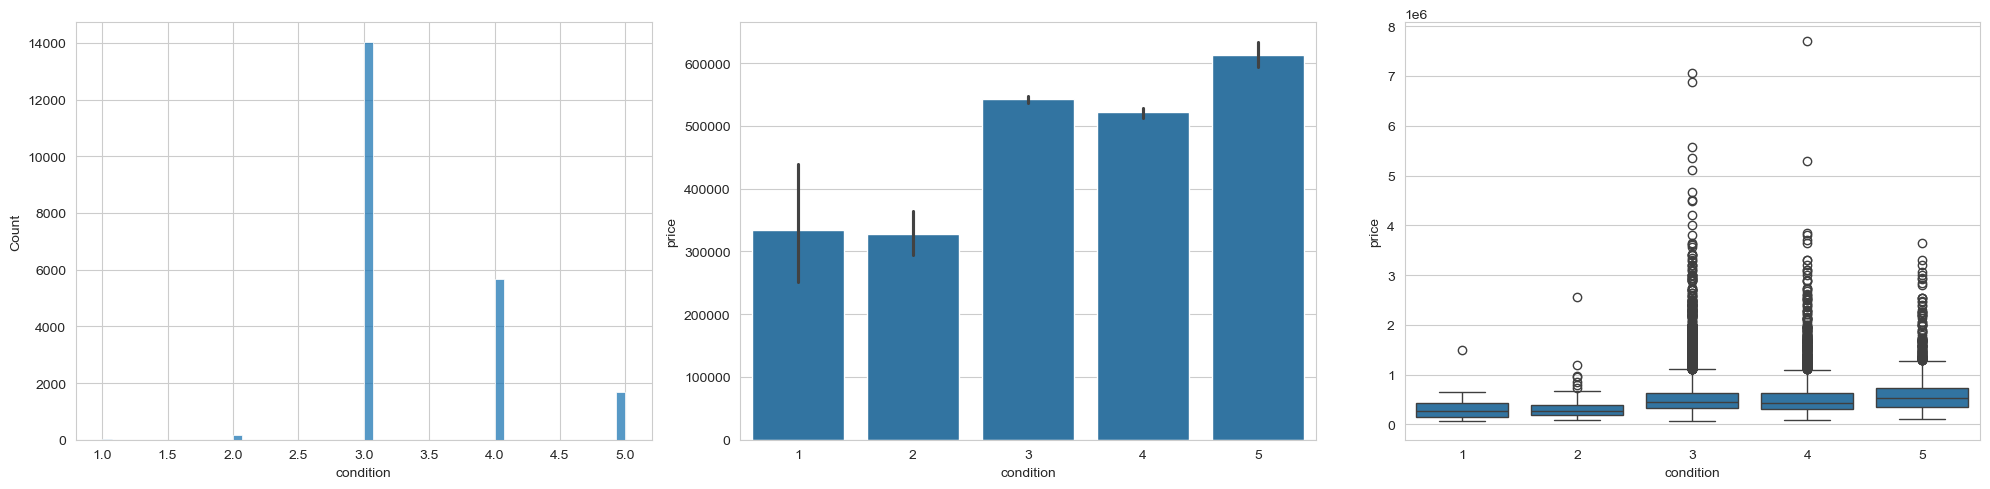

In [105]:
# About condition
fig, axs = plt.subplots(ncols=3, figsize=(20, 5))
sns.histplot(x='condition', data=df, ax=axs[0])
sns.barplot(x='condition', y='price', data=df, ax=axs[1])
sns.boxplot(x='condition', y='price', data=df, ax=axs[2])
plt.tight_layout()

From fig below, the number of house have a `grade` index of 7 is very high, but the price is medium while the number of house have a grade index of 13 is very low, but the price is very high.

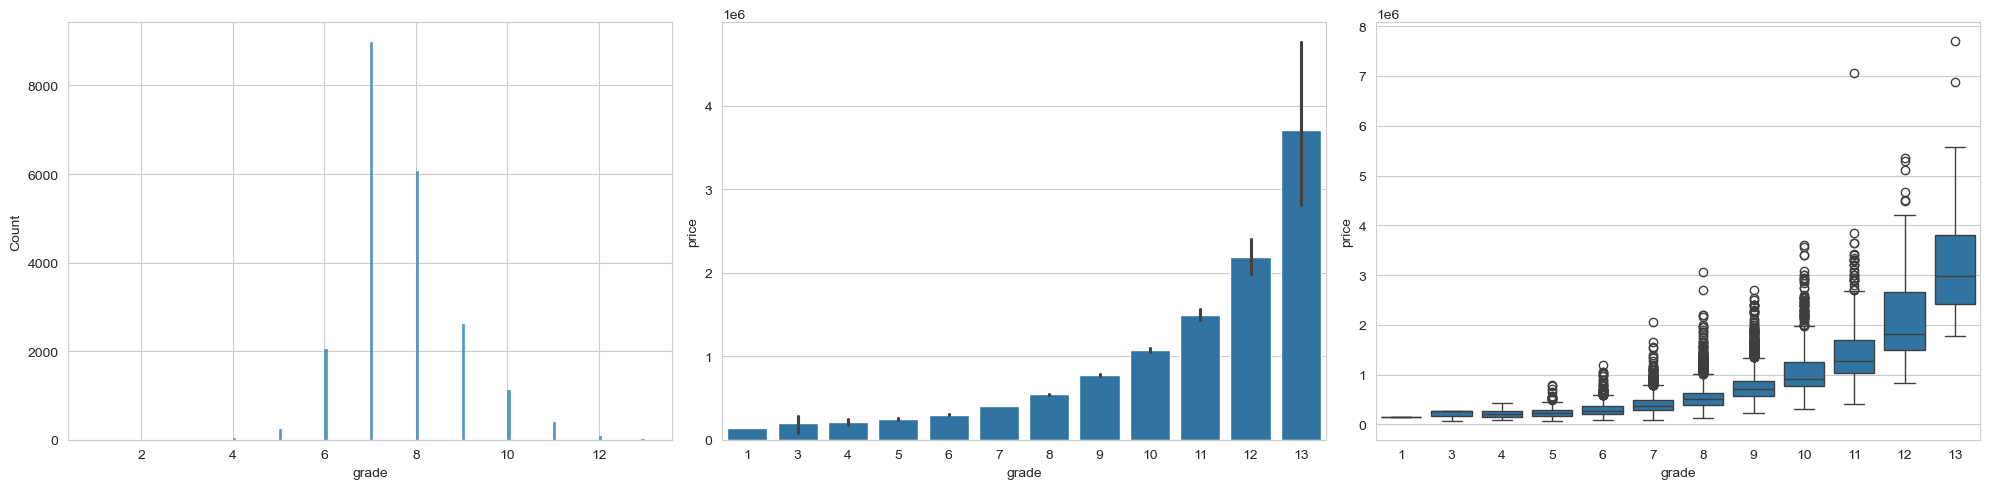

In [106]:
# About grade
fig, axs = plt.subplots(ncols=3, figsize=(20, 5))
sns.histplot(x='grade', data=df, ax=axs[0])
sns.barplot(x='grade', y='price', data=df, ax=axs[1])
sns.boxplot(x='grade', y='price', data=df, ax=axs[2])
plt.tight_layout()

From fig below, the number of house have a `renovated` category is very low, but the price is very high while the number of house have a `not renovated` category is very high, but the price is medium.

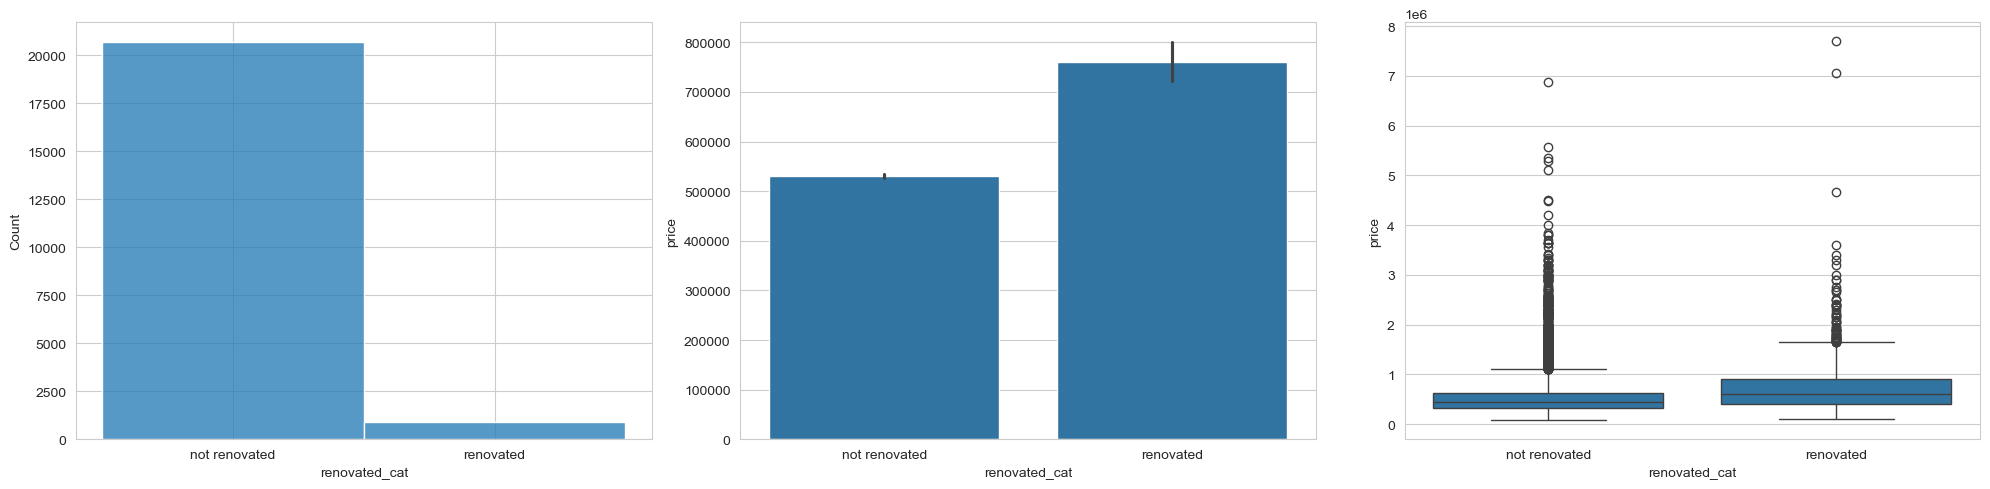

In [107]:
# About renovated
fig, axs = plt.subplots(ncols=3, figsize=(20, 5))
sns.histplot(x='renovated_cat', data=df, ax=axs[0])
sns.barplot(x='renovated_cat', y='price', data=df, ax=axs[1])
sns.boxplot(x='renovated_cat', y='price', data=df, ax=axs[2])
plt.tight_layout()

From the fig below, we can see that the older the house, the lower the price

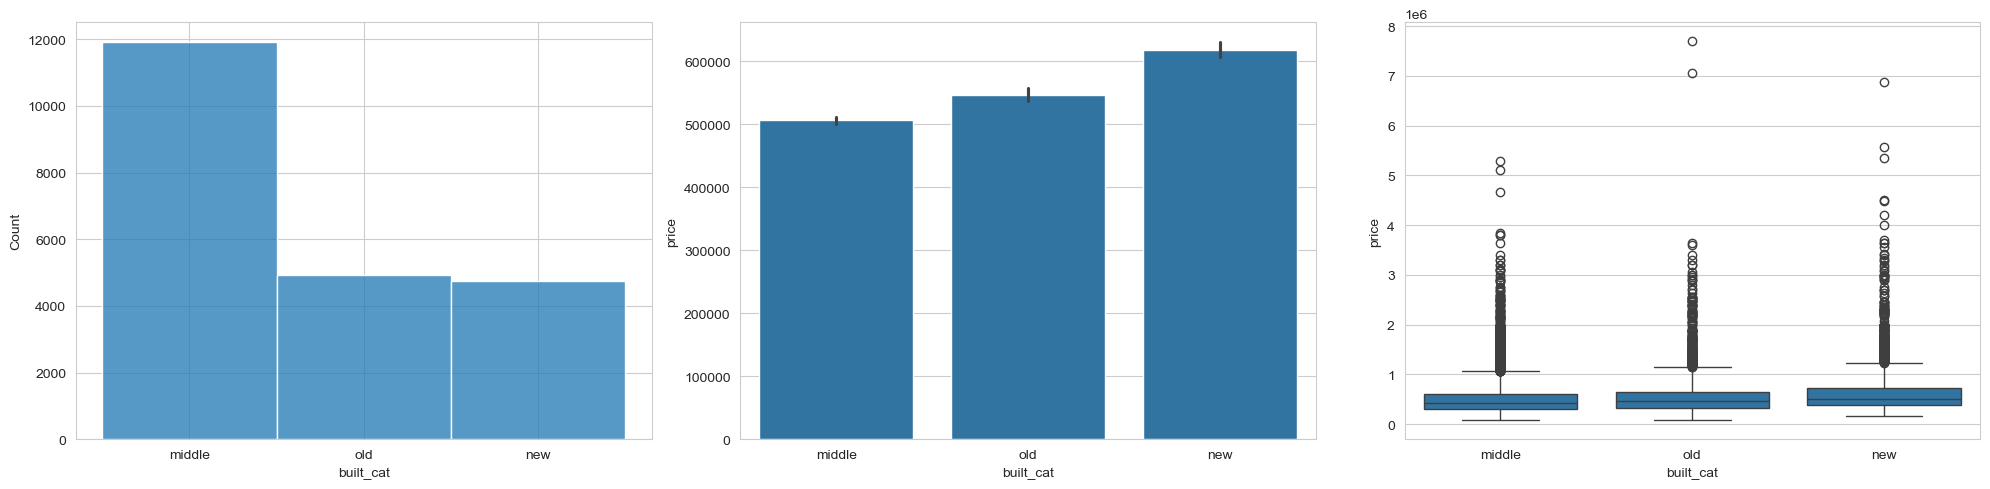

In [108]:
# About built
fig, axs = plt.subplots(ncols=3, figsize=(20, 5))
sns.histplot(x='built_cat', data=df, ax=axs[0])
sns.barplot(x='built_cat', y='price', data=df, ax=axs[1])
sns.boxplot(x='built_cat', y='price', data=df, ax=axs[2])
plt.tight_layout()

From the fig below, we can see that the house with a basement has a higher price than the house without a basement.

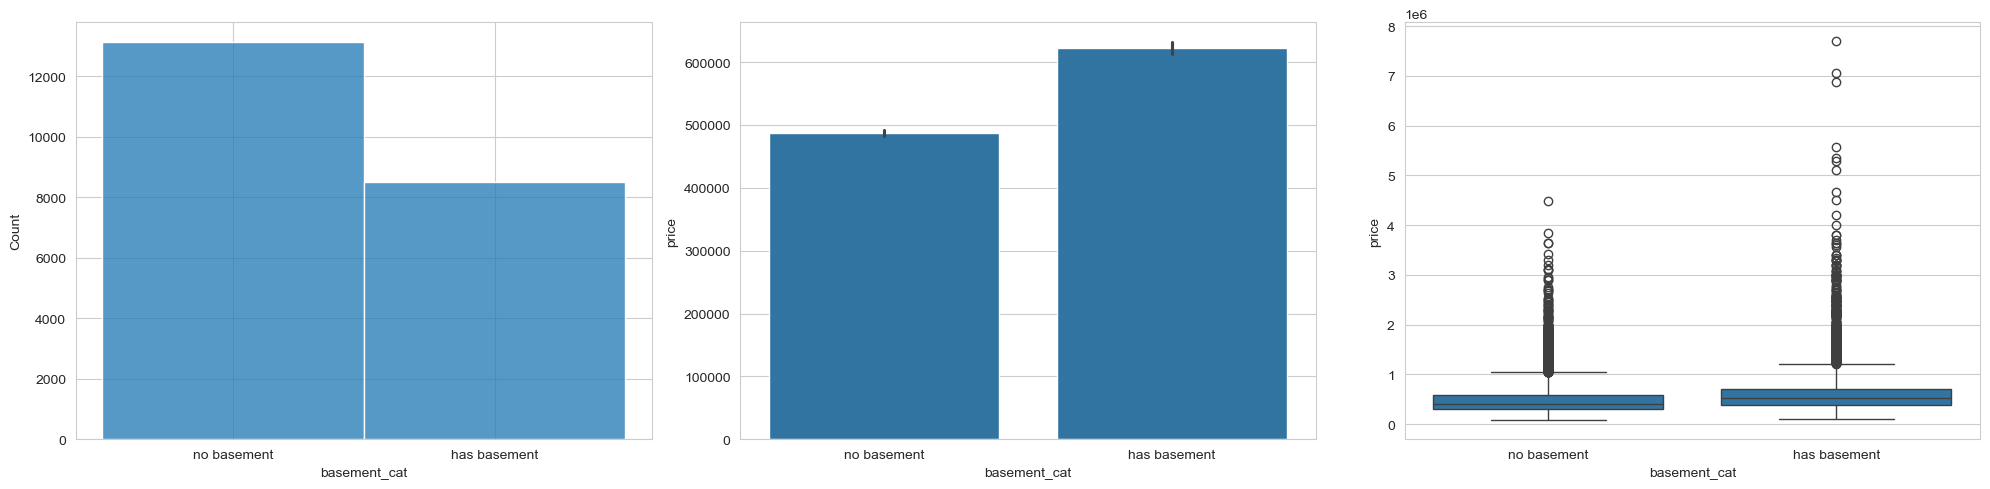

In [109]:
# About basement
fig, axs = plt.subplots(ncols=3, figsize=(20, 5))
sns.histplot(x='basement_cat', data=df, ax=axs[0])
sns.barplot(x='basement_cat', y='price', data=df, ax=axs[1])
sns.boxplot(x='basement_cat', y='price', data=df, ax=axs[2])
plt.tight_layout()

From the fig below, we can see that the larger the living space, the higher the price.

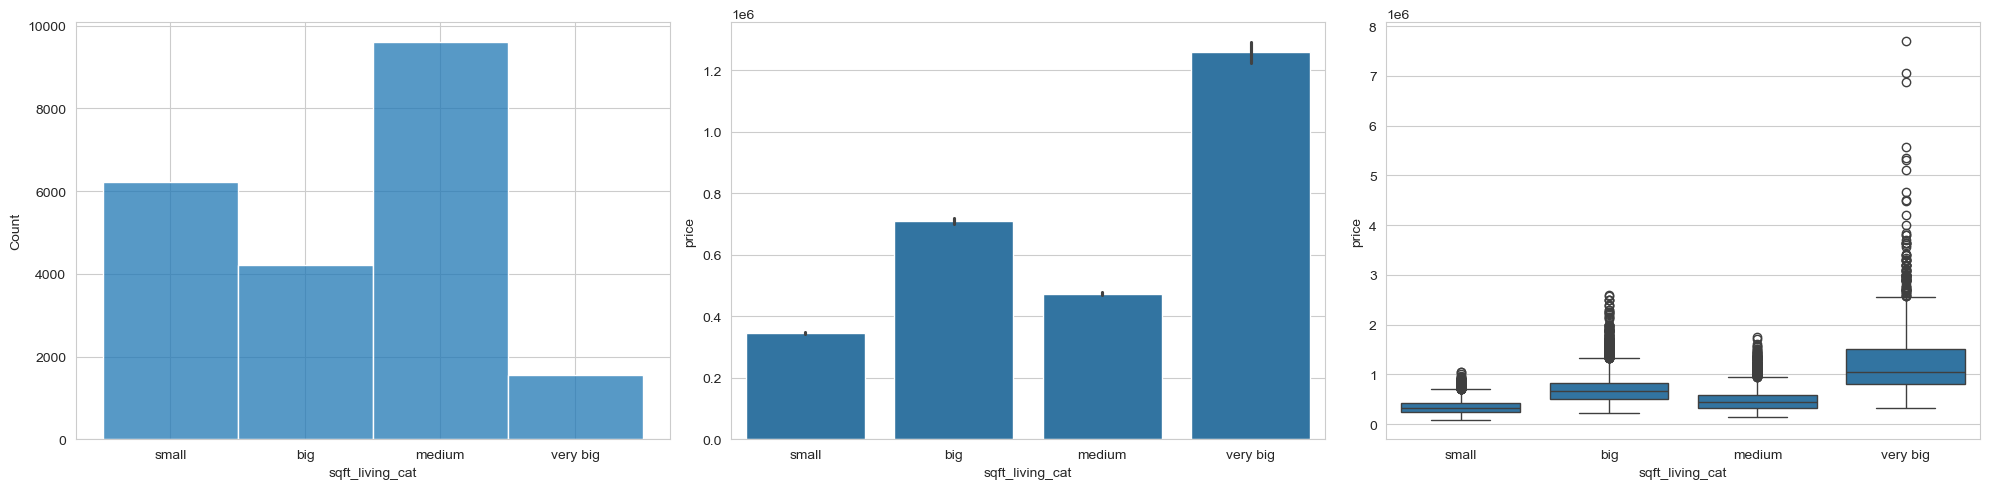

In [110]:
# About sqft_living_cat
fig, axs = plt.subplots(ncols=3, figsize=(20, 5))
sns.histplot(x='sqft_living_cat', data=df, ax=axs[0])
sns.barplot(x='sqft_living_cat', y='price', data=df, ax=axs[1])
sns.boxplot(x='sqft_living_cat', y='price', data=df, ax=axs[2])
plt.tight_layout()

From the fig below, we can see that the larger the land space, the higher the price.

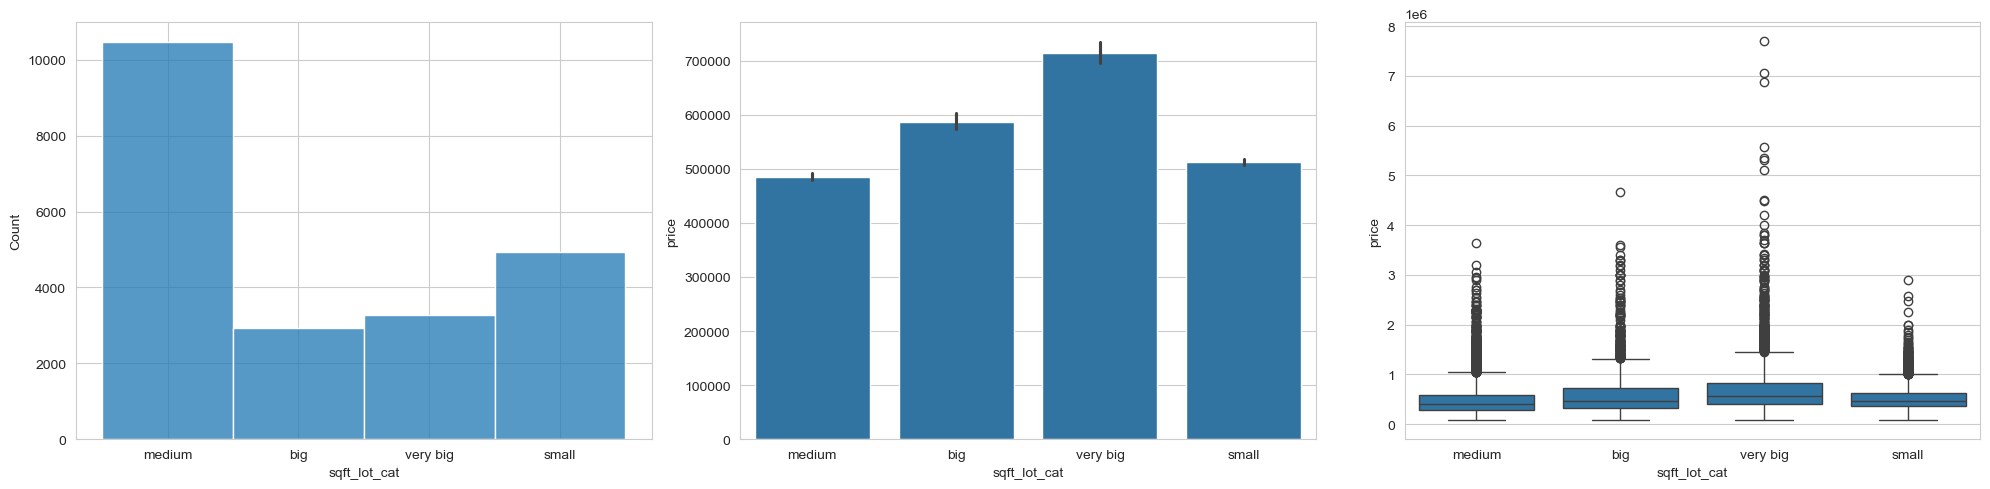

In [111]:
# About sqft_lot_cat
fig, axs = plt.subplots(ncols=3, figsize=(20, 5))
sns.histplot(x='sqft_lot_cat', data=df, ax=axs[0])
sns.barplot(x='sqft_lot_cat', y='price', data=df, ax=axs[1])
sns.boxplot(x='sqft_lot_cat', y='price', data=df, ax=axs[2])
plt.tight_layout()

From the fig below, we can see that the larger the interior housing space above ground level, the higher the price.

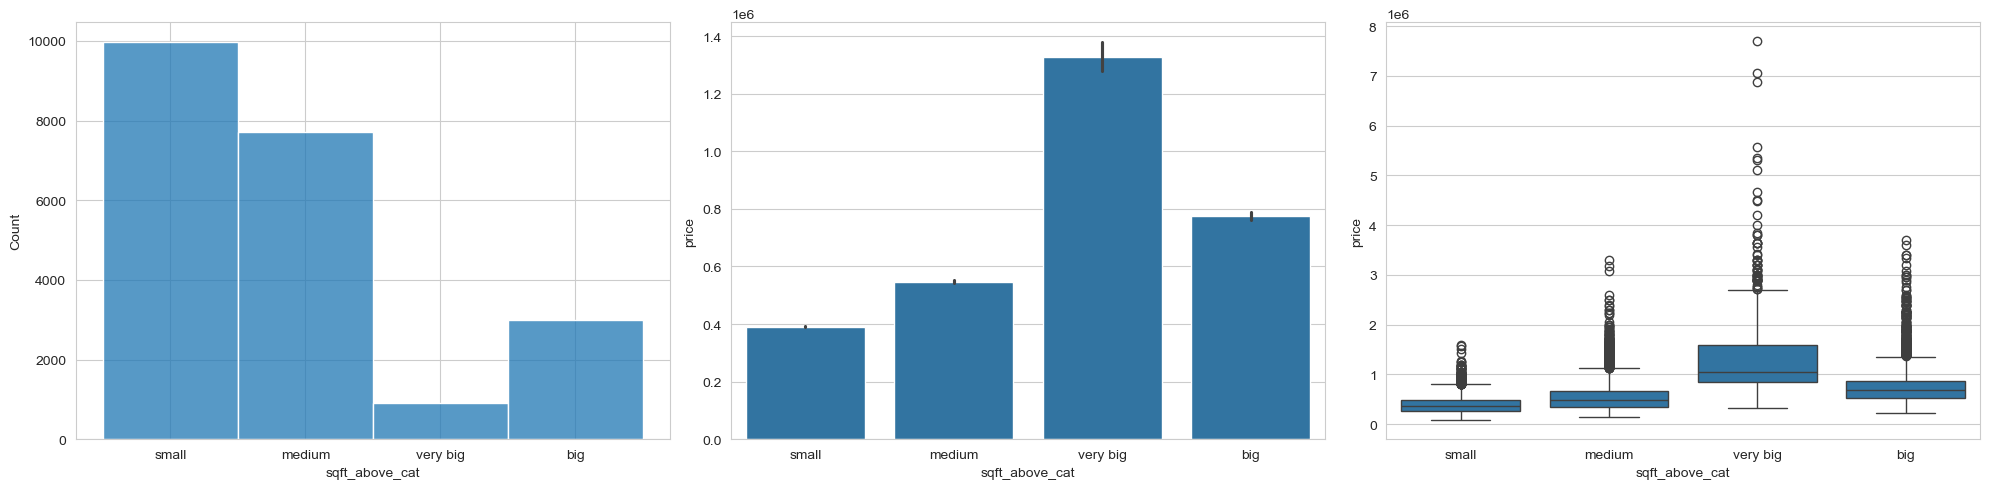

In [112]:
# About sqft_above_cat
fig, axs = plt.subplots(ncols=3, figsize=(20, 5))
sns.histplot(x='sqft_above_cat', data=df, ax=axs[0])
sns.barplot(x='sqft_above_cat', y='price', data=df, ax=axs[1])
sns.boxplot(x='sqft_above_cat', y='price', data=df, ax=axs[2])
plt.tight_layout()

From the fig below, we can see that the larger the interior housing living space for the nearest 15 neighbors, the higher the price.

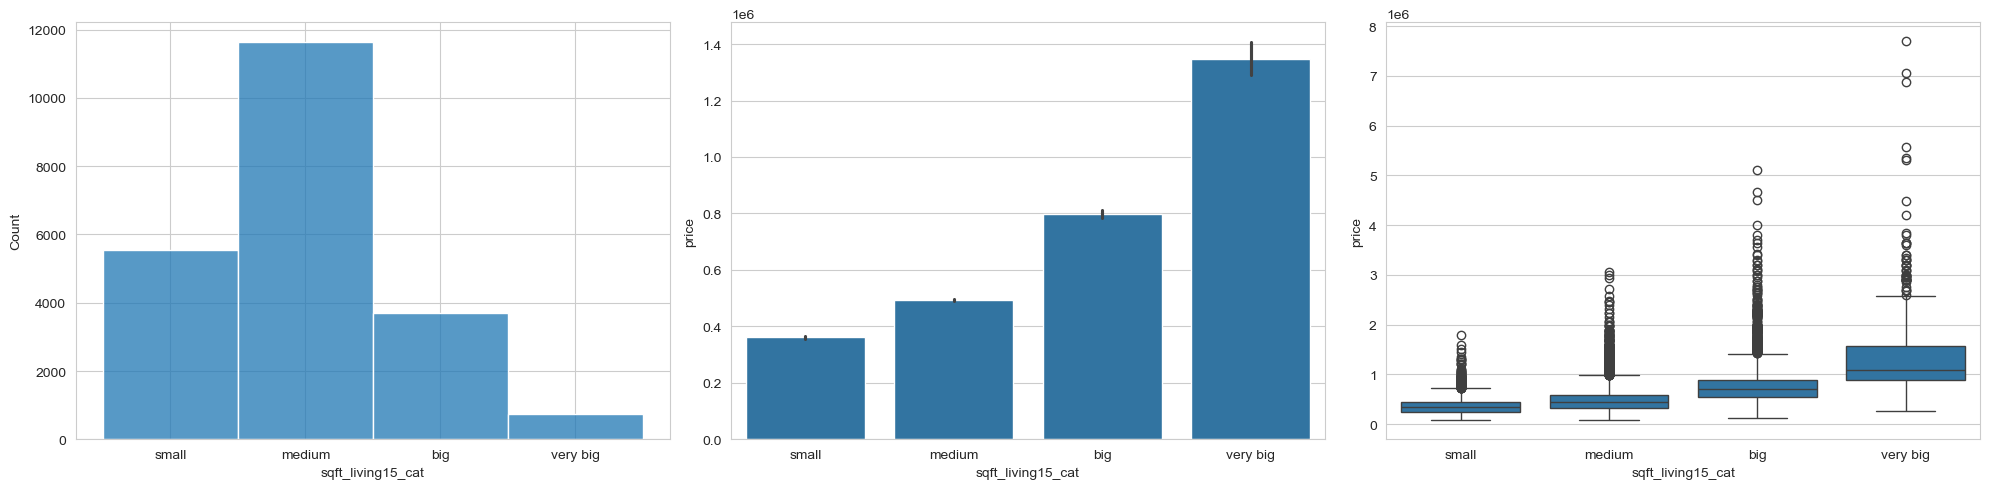

In [113]:
# About sqft_living15_cat
fig, axs = plt.subplots(ncols=3, figsize=(20, 5))
sns.histplot(x='sqft_living15_cat', data=df, ax=axs[0])
sns.barplot(x='sqft_living15_cat', y='price', data=df, ax=axs[1])
sns.boxplot(x='sqft_living15_cat', y='price', data=df, ax=axs[2])
plt.tight_layout()

From the fig below, we can see that the larger the land lots of the nearest 15 neighbors, the higher the price.

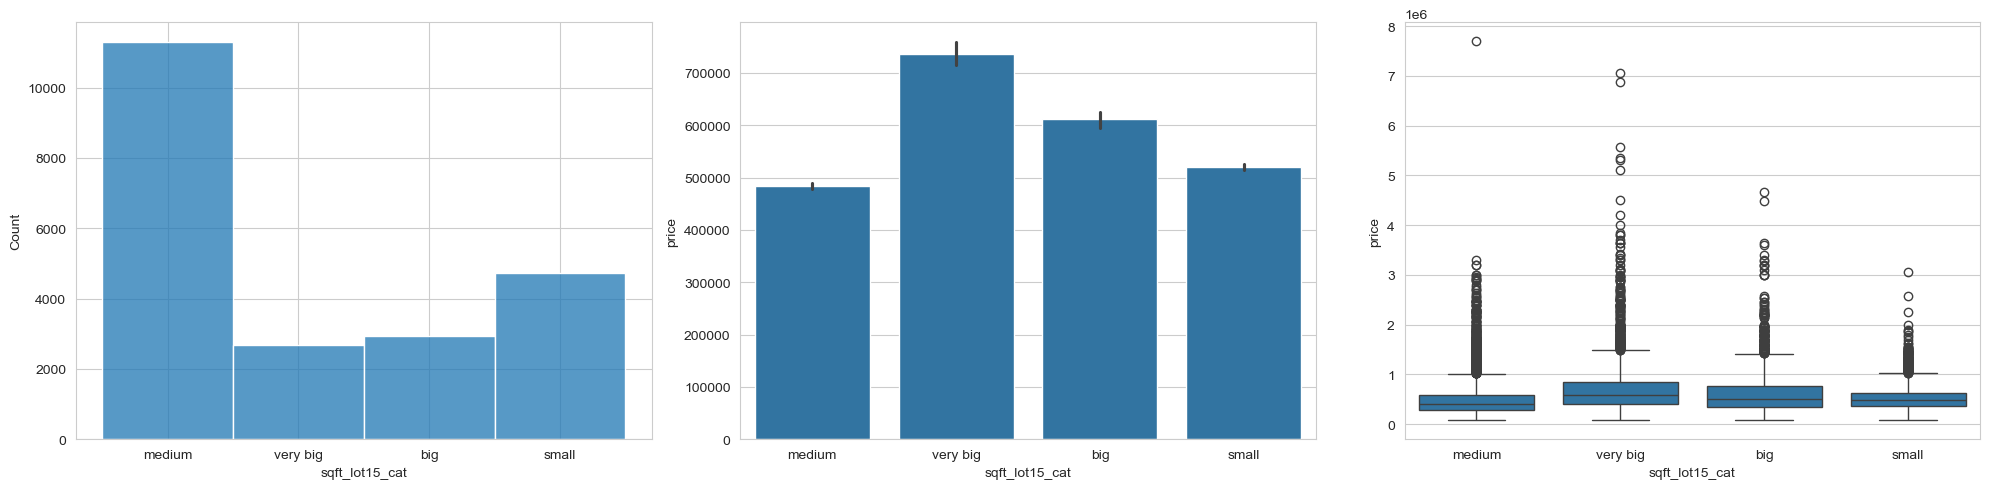

In [114]:
# About sqft_lot15_cat
fig, axs = plt.subplots(ncols=3, figsize=(20, 5))
sns.histplot(x='sqft_lot15_cat', data=df, ax=axs[0])
sns.barplot(x='sqft_lot15_cat', y='price', data=df, ax=axs[1])
sns.boxplot(x='sqft_lot15_cat', y='price', data=df, ax=axs[2])
plt.tight_layout()

From the fig below, we can see that the price is higher for houses located in the north.

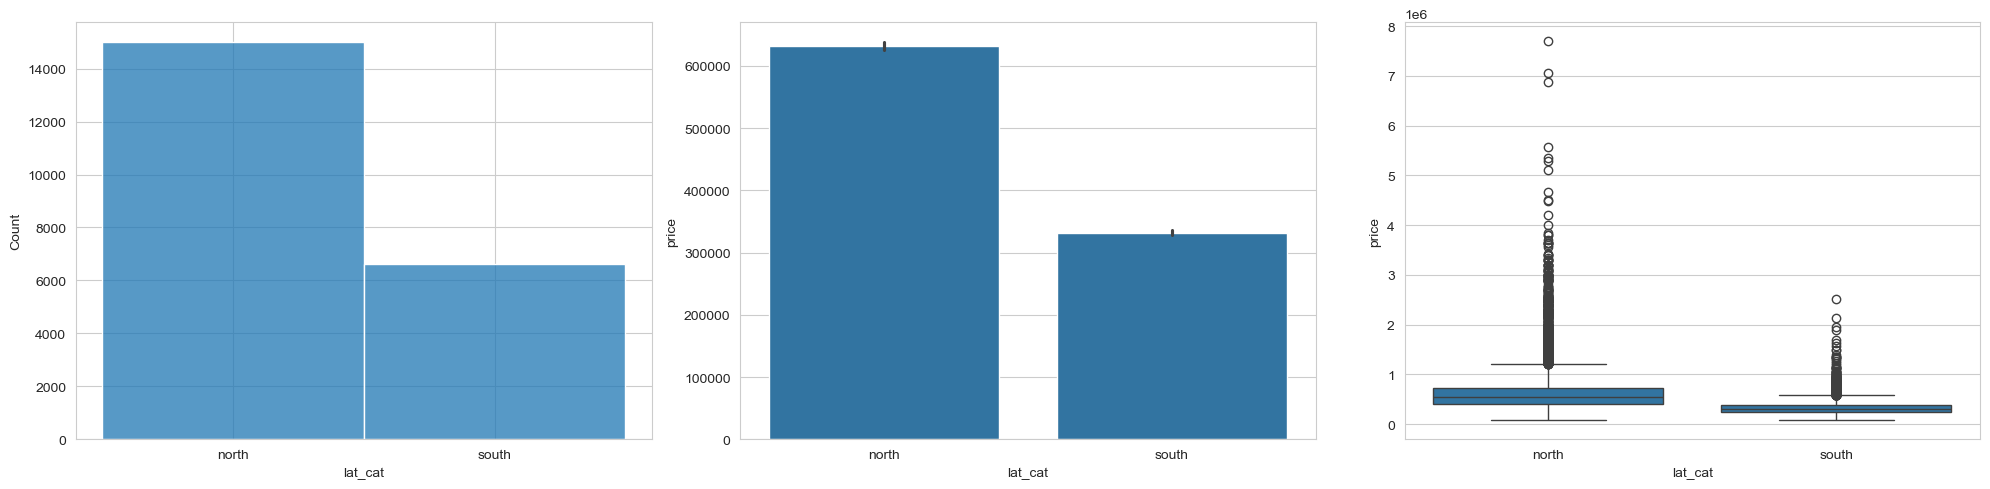

In [115]:
# About lat_cat
fig, axs = plt.subplots(ncols=3, figsize=(20, 5))
sns.histplot(x='lat_cat', data=df, ax=axs[0])
sns.barplot(x='lat_cat', y='price', data=df, ax=axs[1])
sns.boxplot(x='lat_cat', y='price', data=df, ax=axs[2])
plt.tight_layout()

From the fig below, we can see that the price is higher for houses located in the north.

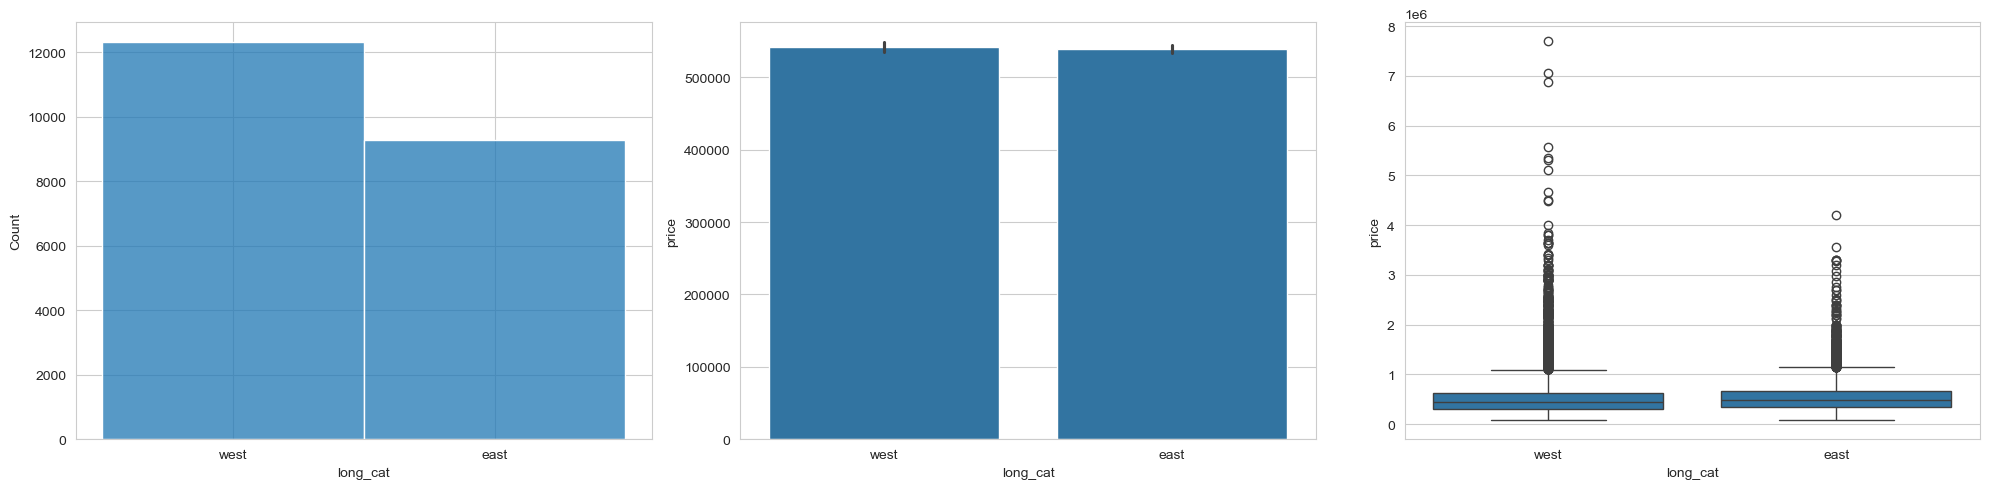

In [116]:
# About long_cat
fig, axs = plt.subplots(ncols=3, figsize=(20, 5))
sns.histplot(x='long_cat', data=df, ax=axs[0])
sns.barplot(x='long_cat', y='price', data=df, ax=axs[1])
sns.boxplot(x='long_cat', y='price', data=df, ax=axs[2])
plt.tight_layout()

Conclusion:
- The price is higher for houses with a waterfront view.
- The price is higher for houses with a better view.
- The price is higher for houses with a higher grade.
- The price is higher for houses with a better condition.
- The price is higher for houses with more bedrooms.
- The price is higher for houses with more bathrooms.
- The price is higher for houses with more floors.
- The price is higher for houses with a larger living space.
- The price is higher for houses with a larger land space.
- The price is higher for houses with a larger interior housing space above ground level.
- The price is higher for houses with a larger interior housing living space for the nearest 15 neighbors.
- The price is higher for houses with a larger land lots of the nearest 15 neighbors.
- The price is higher for houses located in the north.
- The price is higher for houses located in the east.
- The price is higher for houses with a basement.
- The price is higher for houses that have been renovated.
- The price is higher for new houses.

## Correlation 

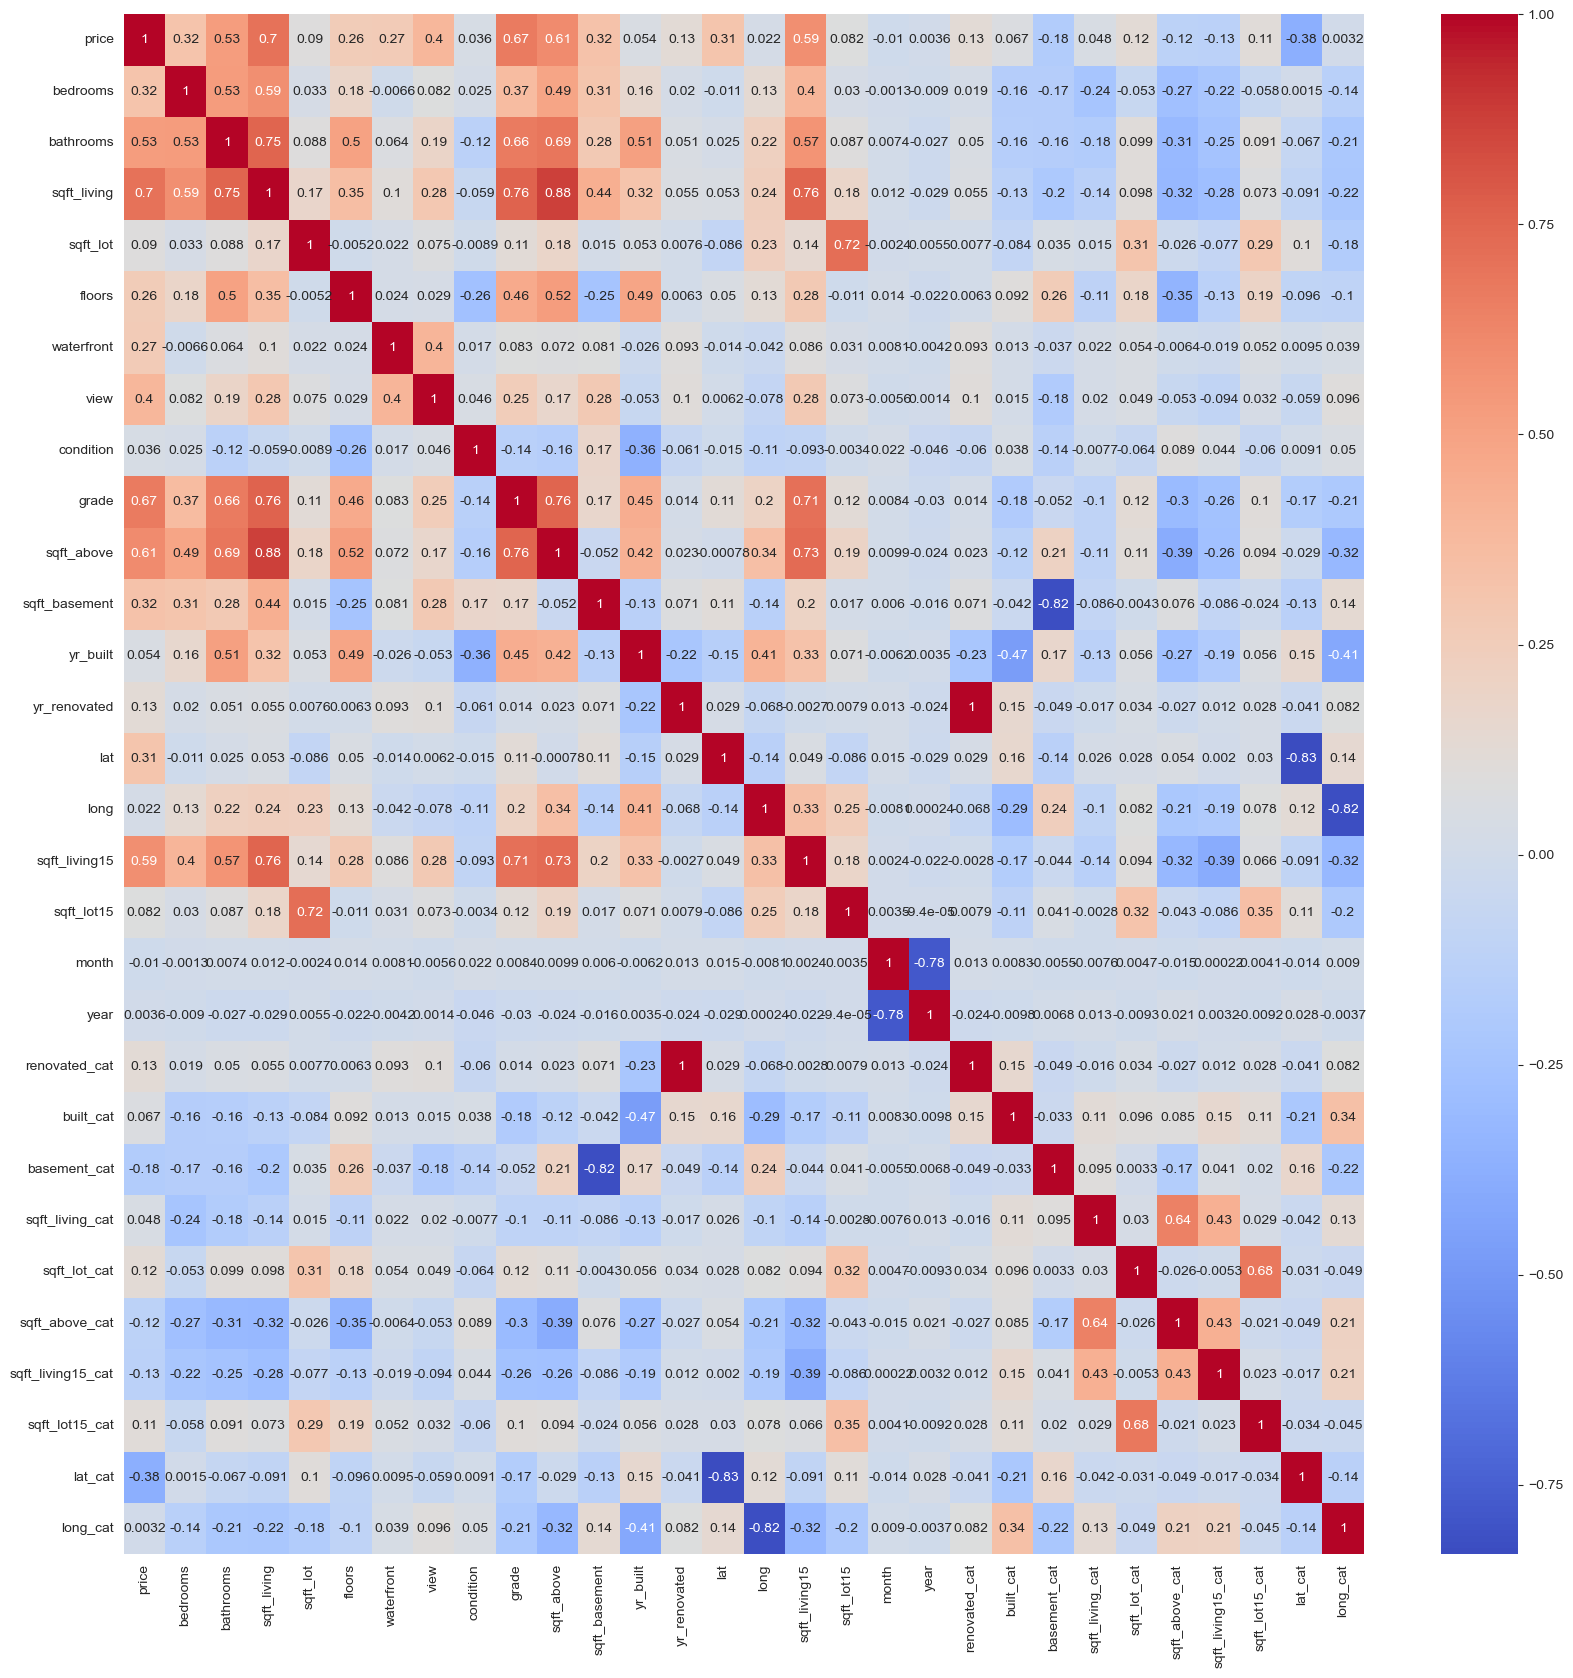

In [117]:
from sklearn.preprocessing import LabelEncoder

df_transform = df.copy()
df_cat = df.select_dtypes(include=['object'])

label = LabelEncoder()
for col in df_cat.columns:
    df_transform[col] = label.fit_transform(df_transform[col])

plt.figure(figsize=(20, 20))
corr_matrix = df_transform.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

The variables most correlated with the `price` are `sqft_living`, `grade`, `sqft_above`, `sqft_living15`, `bathrooms`, `bedrooms`,
We also see that sqft_living and sqft_living15 are highly correlated, so we can remove sqft_living15.

In [118]:
df = df.drop('sqft_living15', axis=1)
# drop some columns that not useful for the model and ui
df = df.drop(['sqft_lot15', 'yr_built', 'yr_renovated', 'lat', 'long', 'lat_cat', 'long_cat', 'sqft_living15_cat', 'sqft_lot15_cat', 'year', 'month', 'yr_renovated', 'yr_built'], axis=1)

In [119]:
# sqft_living, bedrooms, bathrooms, sqft_above, grade are highly correlated with price
# sns.lmplot(x='sqft_living', y='price', data=df, hue='grade', palette='coolwarm')
# 
# sns.lmplot(x='sqft_living', y='price', data=df, hue='bedrooms', palette='coolwarm')
# 
# sns.lmplot(x='sqft_living', y='price', data=df, hue='bathrooms', palette='coolwarm')
# 
# sns.lmplot(x='sqft_living', y='price', data=df, hue='sqft_above_cat', palette='coolwarm')


### Experimenting with different models

Split the data into training and testing sets

In [121]:
from sklearn.model_selection import train_test_split

category_names = ['waterfront', 'view', 'condition', 'grade', 'renovated_cat', 'built_cat', 'basement_cat', 'sqft_living_cat', 'sqft_lot_cat', 'sqft_above_cat', ]
df[category_names] = df[category_names].astype('category')
# transform all category data to object
df[category_names] = df[category_names].apply(lambda x: x.astype('object'))

X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [122]:
train = X_train.join(y_train, lsuffix='_X_train', rsuffix='_y_train')
test = X_test.join(y_test, lsuffix='_X_test', rsuffix='_y_test')

train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,renovated_cat,built_cat,basement_cat,sqft_living_cat,sqft_lot_cat,sqft_above_cat,price
6325,3,1.75,1780,13095,1.0,0,0,4,9,1780,0,not renovated,middle,no basement,medium,big,medium,325000.0
13473,2,1.00,1000,3700,1.0,0,0,3,6,800,200,not renovated,old,has basement,small,small,small,257000.0
17615,3,2.50,1990,7577,2.0,0,0,3,7,1990,0,not renovated,middle,no basement,medium,medium,medium,293000.0
16971,3,1.75,1350,9793,1.0,0,0,4,7,1350,0,not renovated,middle,no basement,small,medium,small,225000.0
20868,2,2.50,1741,1439,2.0,0,0,3,8,1446,295,not renovated,new,has basement,medium,small,small,479000.0


### Choose Models and Scalers

The regression models are chosen:
- `LinearRegression`
- `Ridge`
- `KNeighborsRegressor`
- `DecisionTreeRegressor`
- `RandomForestRegressor`

In [123]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

clf_names = ["LinearRegression", "RidgeRegression", "KNeighborsRegressor", "DecisionTreeRegressor", "RandomForestRegressor"]
clfs = [LinearRegression(), Ridge(), KNeighborsRegressor(), DecisionTreeRegressor(), RandomForestRegressor()]

The scalers are chosen:
- `StandardScaler`
- `MinMaxScaler`
- `Normalizer`
- `RobustScaler`

In [124]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, RobustScaler

sc_names = ["StandardScaler", "MinMaxScaler", "Normalizer", "RobustScaler"]
scs = [StandardScaler(), MinMaxScaler(), Normalizer(), RobustScaler()]

### Setup Pipeline

Create pipeline:

1.   Apply `StandardScaler` on numeric variables and `OrdinalEncoder` on categorical variables (Feature Scaling, Encoding).
2.   Apply Feature Scaling with the four scalers: `StandardScaler`, `MinMaxScaler`, `Normalizer`, `RobustScaler` (Feature Scaling).
3.   Choose $k=6$ best/importance features over total $8$ using `SelectKBest` (Importance Features).
4.   Predict with the five regression models: `LinearRegression`, `Ridge`, `KNeighborsRegressor`, `DecisionTreeRegressor`, `RandomForestRegressor`.
5.   Evaluate model based on the two metrics: $RMSE$ (Root Mean Squared Error), $R^2$ score.

In [125]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names=attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [126]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import OrdinalEncoder

numerics = X_train.select_dtypes(include=['float64', 'int64'])
categoricals = X_train.select_dtypes(include=['object'])

numerical_pipeline = Pipeline([
    ("select_numeric", DataFrameSelector(numerics.columns.to_list())),
    ("std_scaler", StandardScaler()),
])

categorical_pipeline =  Pipeline([
    ("select_categoricals", DataFrameSelector(categoricals.columns.to_list())),
    ("label_encoder", OrdinalEncoder()),
])

def apply_pipeline(scaler, regressor):
    return Pipeline([
        ('features', FeatureUnion(transformer_list=[
            ('num_pipeline', numerical_pipeline),
            ('cat_pipeline', categorical_pipeline)
        ])),
        ('scaler', scaler),
        ('kbest', SelectKBest(f_regression, k=6)),
        ('regressor', regressor)
    ])

Evaluate model with Root Mean Square Error, $R^2$

In [127]:
from sklearn.metrics import r2_score, mean_squared_error

def compute_rmse(model, X, y):
    y_pred = model.predict(X)
    return np.sqrt(mean_squared_error(y, y_pred))

def compute_rsquared(model, X, y):
    y_pred = model.predict(X)
    return r2_score(y, y_pred)

### Apply Pipeline

In [128]:
result = []
importance_features = []
importance_feature_values = []
for clf_name, clf in zip(clf_names, clfs):
    for sc_name, sc in zip(sc_names, scs):
        pipe = apply_pipeline(scaler=sc, regressor=clf)
        model_fit = pipe.fit(X_train, y_train)

        train_rmse = compute_rmse(model_fit, X_train, y_train)
        test_rmse = compute_rmse(model_fit, X_test, y_test)

        train_rsquared = compute_rsquared(model_fit, X_train, y_train)
        test_rsquared = compute_rsquared(model_fit, X_test, y_test)

        result.append((clf_name, sc_name, train_rmse, test_rmse, train_rsquared, test_rsquared))

        kbest = pipe.named_steps['kbest'].get_support()
        importance_features.append([clf_name, sc_name] + list(map(bool, kbest)))

        temp_if_values = None
        clf_root = pipe.named_steps['regressor']
        try:
            temp_if_values = list(map(str, clf_root.feature_importances_))
        except Exception as e:
            try:
                temp_if_values = list(map(str, clf_root.coef_))
            except Exception as e:
                pass

        if temp_if_values:
            temp_series = pd.Series(data=list(map(bool, kbest)))
            temp_series[temp_series==True] = temp_if_values
            temp_series[temp_series==False] = 'Omitted'
            importance_feature_values.append([clf_name, sc_name] + temp_series.to_list())

## Results

In [129]:
df_result = pd.DataFrame(data=result, columns=["Classifier","Scaler","Train RMSE", "Test RMSE","Train R2", "Test R2"]).sort_values('Test RMSE')
df_result

,Classifier,Scaler,Train RMSE,Test RMSE,Train R2,Test R2
0,LinearRegression,StandardScaler,235963.718019,251094.424997,0.574779,0.579920
1,LinearRegression,MinMaxScaler,235963.718019,251094.424997,0.574779,0.579920
3,LinearRegression,RobustScaler,235963.718019,251094.424997,0.574779,0.579920
4,RidgeRegression,StandardScaler,235963.718291,251095.020845,0.574779,0.579918
7,RidgeRegression,RobustScaler,235963.718442,251095.074963,0.574779,0.579918
5,RidgeRegression,MinMaxScaler,235966.762043,251150.679917,0.574768,0.579732
17,RandomForestRegressor,MinMaxScaler,114130.158808,254767.465443,0.900522,0.567540
19,RandomForestRegressor,RobustScaler,114668.586359,255016.864745,0.899582,0.566693
16,RandomForestRegressor,StandardScaler,114181.368692,255729.851887,0.900433,0.564267
18,RandomForestRegressor,Normalizer,84655.345325,256583.648490,0.945269,0.561353


The best model is RandomForestRegressor with Normalizer. The model has the lowest RMSE and the highest R2 score.

In [130]:
# Save the model and scaler for deployment
import joblib

best_model = RandomForestRegressor()
best_scaler = Normalizer()

pipe = apply_pipeline(scaler=best_scaler, regressor=best_model)
model_fit = pipe.fit(X, y)

joblib.dump(model_fit, 'model.pkl')
joblib.dump(best_scaler, 'scaler.pkl')

['scaler.pkl']

In [136]:
# Load the model and scaler
model = joblib.load('model.pkl')
scaler = joblib.load('scaler.pkl')

# # Predict a given data row include some of the features
data = {
    'bedrooms': 3,
    'bathrooms': 2.25,
    'sqft_living': 2570,
    'sqft_lot': 7242,
    'floors': 2,
    'waterfront': 0,
    'view': 0,
    'condition': 3,
    'grade': 7,
    'sqft_above': 2170,
    'sqft_basement': 400,
    'renovated_cat': 'renovated',
    'built_cat': 'old',
    'basement_cat': 'has basement',
    'sqft_living_cat': 'big',
    'sqft_lot_cat': 'medium',
    'sqft_above_cat': 'medium',
}
model_input = pd.DataFrame([data])
model.predict(model_input)


array([571191.58])